In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
!pip install seaborn

# Loading the data and a first look

In [18]:
data=pd.read_csv("train (1).csv")
data.shape

(343746, 21)

In [19]:
data.head()

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,1,1.75,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
1,1,2.95,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
2,1,2.46,7,5,19,132,4,1016,1,MN25,1,MN27,-74.012741,40.702229,-73.998878,40.713711,2,1,1.14,11.5,MN25-MN27
3,1,1.66,11,5,20,134,6,550,1,MN99,1,MN20,-73.970909,40.767231,-73.979507,40.752331,2,1,1.28,7.5,MN99-MN20
4,1,1.75,20,5,19,128,7,501,1,MN20,1,MN22,-73.973869,40.747925,-73.986618,40.730328,1,1,1.40,7.5,MN20-MN22


# Fixing column names

From the first 5 rows of the table, it looks like the column "Unnamed: 0" is just one more than the value of the index of each row. After testing that in fact this is true with an assertion, we removed the column.

In [20]:
data["Unnamed: 0"] = data["Unnamed: 0"].apply(lambda x: x-1)
assert np.array_equal(np.array(data.index), np.array(data["Unnamed: 0"]))
data = data.drop(["Unnamed: 0"], axis=1) ## redundant index column dropped

KeyError: 'Unnamed: 0'

Then we change the column name such as every word is divided by a '_' and that all letters are lower case. We also fixed a spelling mistake.

In [21]:
#unifying names 
data = data.rename(columns={"pickup_BoroCode":"pickup_boro_code","pickup_NTACode":"pickup_nta_code","dropoff_BoroCode":"dropoff_boro_code","dropoff_NTACode":"dropoff_nta_code", "pickup_doy":"pickup_day"})
data

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,1,1.75,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
1,1,2.95,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
2,1,2.46,7,5,19,132,4,1016,1,MN25,1,MN27,-74.012741,40.702229,-73.998878,40.713711,2,1,1.14,11.5,MN25-MN27
3,1,1.66,11,5,20,134,6,550,1,MN99,1,MN20,-73.970909,40.767231,-73.979507,40.752331,2,1,1.28,7.5,MN99-MN20
4,1,1.75,20,5,19,128,7,501,1,MN20,1,MN22,-73.973869,40.747925,-73.986618,40.730328,1,1,1.40,7.5,MN20-MN22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343741,1,2.00,20,5,21,145,3,740,1,MN12,1,MN36,-73.978676,40.783512,-73.938370,40.850533,2,1,5.84,18.5,MN12-MN36
343742,1,1.00,23,5,21,141,6,193,1,MN14,1,MN12,-73.982048,40.775452,-73.976860,40.783520,2,6,0.70,4.5,MN14-MN12
343743,1,2.35,19,5,19,132,4,764,1,MN20,1,MN22,-73.974472,40.747253,-73.983070,40.726955,1,1,1.70,10.0,MN20-MN22
343744,1,2.65,21,5,20,140,5,955,1,MN13,1,MN27,-73.993607,40.745293,-73.987350,40.722256,1,1,2.20,12.0,MN13-MN27


# Understanding what each variable measures
We created the following function called *describe* that takes as input a column of the dataset and shows the number of observations of that column, the mean, std, min, max and the three quartiles. It also shows the set of values of the observations and also plots a histogram. 

In [6]:
def describe(column, n = 10):
    print(data[column].describe())
    if len(set(data[column]))>50:
        print(str(set(data[column][0:50]))[0:1000])
    else:
        print(set(data[column]))
    data[column].hist(bins = n) 

count    343746.000000
mean         13.611021
std           6.464310
min           0.000000
25%           9.000000
50%          14.000000
75%          19.000000
max          23.000000
Name: pickup_hour, dtype: float64
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


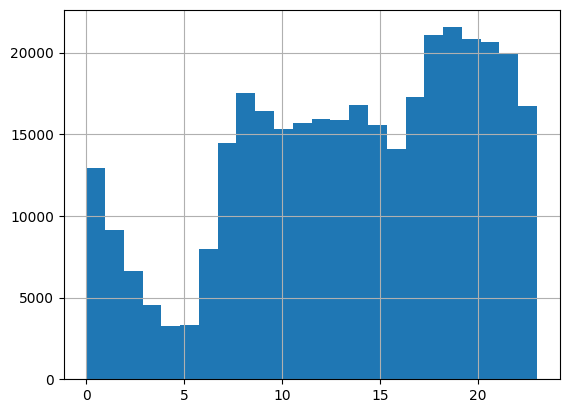

In [7]:
describe("pickup_hour", 24)

In the early morning between 1:00 and 6:00 we have a low in pickups, which is expected since mayority of people are sleeping at these hours. Then between 18:00 and 22:00 we see a clear high in pickups, something expected in a city like NYC that has a big nightlife.

count    343746.0
mean          5.0
std           0.0
min           5.0
25%           5.0
50%           5.0
75%           5.0
max           5.0
Name: pickup_month, dtype: float64
{5}


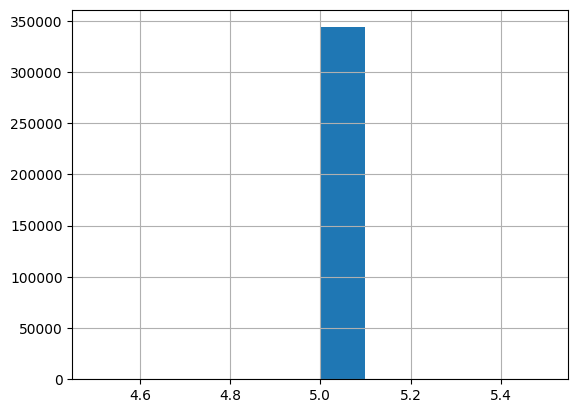

In [8]:
describe("pickup_month") 

The subset of datapoint is only from May. Dropping this column should be considered since it is explicitly said in the description and can be inferred from other columns.

count    343746.000000
mean         19.898952
std           1.278130
min          18.000000
25%          19.000000
50%          20.000000
75%          21.000000
max          22.000000
Name: pickup_week, dtype: float64
{18, 19, 20, 21, 22}


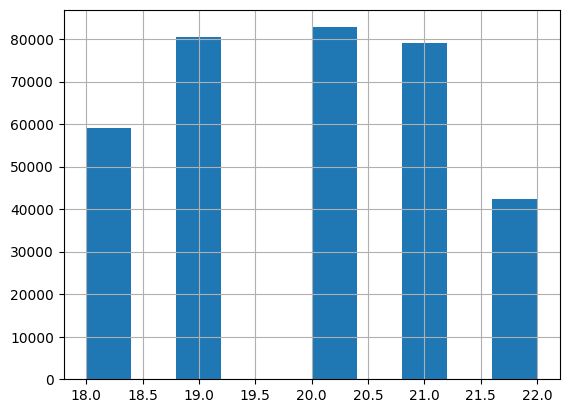

In [9]:
describe("pickup_week")

We have the 5 weeks May had that year. The first and last weeks may not have had all seven days in May and this might have cause both to be lower by a considerable margin compared to the other three.

count    343746.000000
mean        136.336106
std           8.667694
min         122.000000
25%         129.000000
50%         136.000000
75%         144.000000
max         152.000000
Name: pickup_day, dtype: float64
{128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 122, 123, 124, 125, 126, 127}


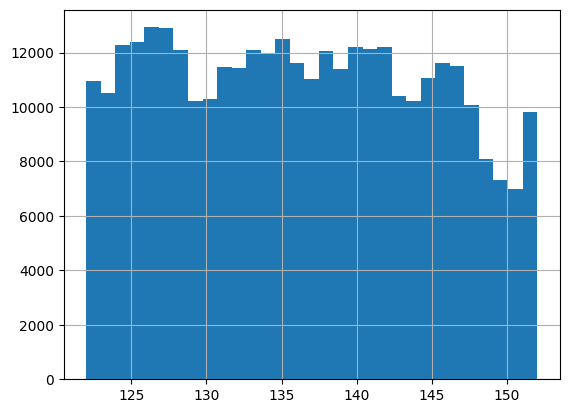

In [10]:
describe("pickup_day", 31)

All days of May seem to stay in a certain range, except the last days of the month which have a considerable dropoff.

count    343746.000000
mean          3.916392
std           1.978984
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max           7.000000
Name: pickup_wday, dtype: float64
{1, 2, 3, 4, 5, 6, 7}


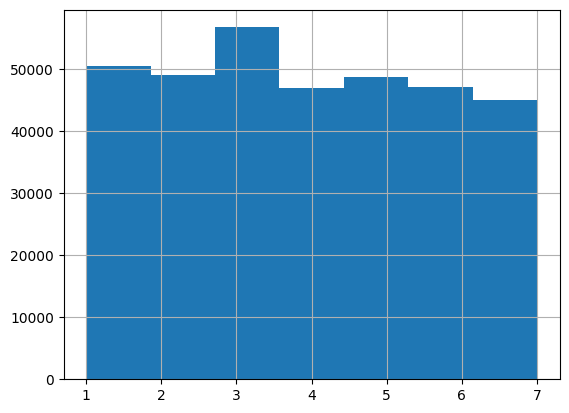

In [11]:
describe("pickup_wday", 7)

The weekdays seem to have a steady decline from 1 to 7, with week day 3 breaking this rule by being the mode. We cannot infer on why is this it is not explicitly said which number represents which day. We cannot assume 1 is monday and so on with no check.

count    343746.000000
mean        985.571538
std        2709.787972
min           0.000000
25%         433.000000
50%         716.000000
75%        1157.000000
max       86393.000000
Name: length_time, dtype: float64
{1536, 390, 520, 649, 648, 271, 912, 655, 530, 4760, 408, 1053, 287, 288, 1058, 550, 2342, 296, 1066, 426, 172, 175, 177, 1331, 1591, 824, 312, 56, 955, 961, 1475, 457, 461, 593, 724, 2267, 1627, 861, 478, 1118, 609, 3170, 226, 742, 744, 1385, 746, 879, 501, 1016}


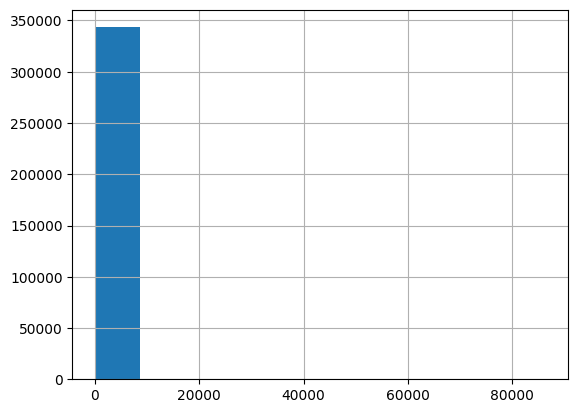

In [12]:
describe("length_time")

0.80000    1286.000
0.90000    1728.000
0.95000    2193.000
0.99000    3241.000
0.99500    3598.115
0.99900    4063.000
0.99905    4069.000
Name: length_time, dtype: float64


<Axes: >

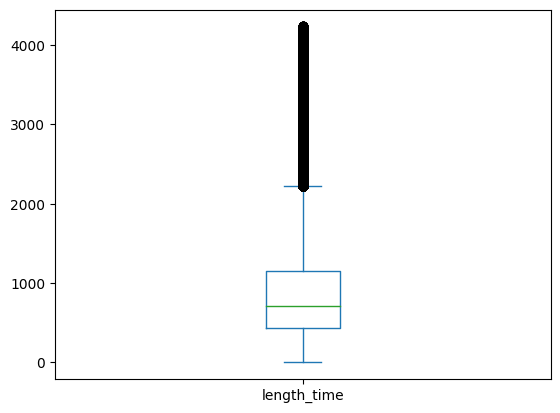

In [25]:
print(data["length_time"].quantile([0.8,0.9,0.95,0.99,0.995,0.999, 0.99905]))
data=data[data["length_time"]<=4236]
data["length_time"].plot.box() 

As we see there are a lot of outliers. It does not make sense that a taxi could take such long times when they are only working inside a city. The reason there are outliers could go from the taximeter being broke to the taxi driver leaving it running the whole day while not taking any rides. Rides that were less than one minute could be really short rides, missclicks by the driver which ended the ride early, or the ride ending in a short time by a situation with the passenger(s).

There are 3600 seconds is an hour, what to potentially do with that many outliers? Where could be the cutoff point? If we were to later remove outliers, we would propose a cutoff at 0.99 or 0.995 depending on the goal of the analysis for this dataset.

We have to investigate further. There are possible outliers in terms of time<60 and large time since we have time given in seconds.

In [31]:
data=data.loc[data["length_time"]>=60] 


Some of the rides are reasonable, somebody got a cab for like 0.2 km and that takes a minute.

In [30]:
data=data.loc[data["length_time"]>=10] 

We believe a ride has to last at least 10 seconds to be considered one, but we will not delete datapoints without having a goal for the dataset.

In [29]:
data=data.loc[data["trip_distance"]>=0.01]

count    341009.000000
mean          1.203795
std           0.729119
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: pickup_boro_code, dtype: float64
{1, 2, 3, 4, 5}


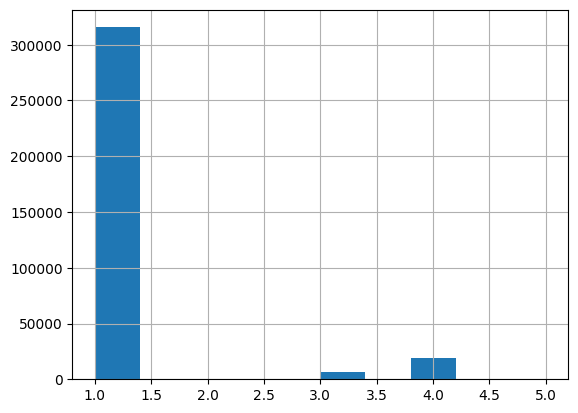

In [32]:
describe("pickup_boro_code") 

The five boroughs of NYC: 1 is Manhattan, 2 is The Bronx, 3 is Brooklyn,  4 is Queens, and 5 is Staten Island.

count    341009.000000
mean          1.269773
std           0.782938
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: dropoff_boro_code, dtype: float64
{1, 2, 3, 4, 5}


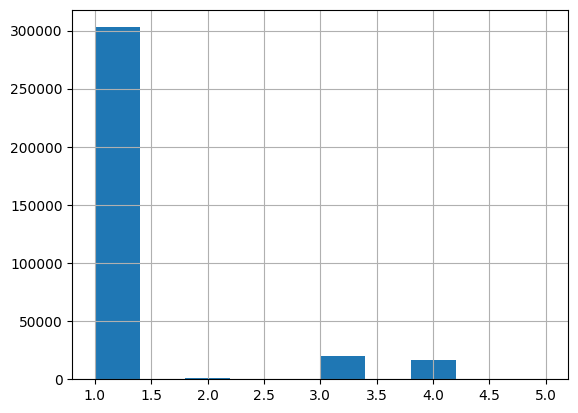

In [33]:
describe("dropoff_boro_code")

Also includes the 5 boroughs.

In [34]:
data["pickup_nta_code"].describe()

count     341009
unique       137
top         MN17
freq       53038
Name: pickup_nta_code, dtype: object

The letters represent the borough of the location and the numbers a part of the borough.

In [144]:
data["dropoff_nta_code"].describe()

count     491292
unique       190
top         MN17
freq       70333
Name: dropoff_nta_code, dtype: object

Same description as above.

count    491292.000000
mean        -73.973938
std           0.037660
min         -74.104080
25%         -73.992378
50%         -73.981934
75%         -73.967644
max         -73.728279
Name: pickup_longitude, dtype: float64
{-73.9584426879883, -73.9805145263672, -74.0127410888672, -74.0051040649414, -74.0039520263672, -73.9949798583984, -73.9932479858398, -73.9895095825195, -73.9738693237305, -73.9942092895508, -73.9512786865234, -73.9773330688477, -73.9659576416016, -73.9989929199219, -73.9599533081055, -73.9662322998047, -73.9819412231445, -73.9941482543945, -73.982307434082, -73.8132400512695, -73.986198425293, -73.9939422607422, -74.0097885131836, -73.9934005737305, -73.99951171875, -73.9750518798828, -73.9744644165039, -73.9405136108398, -73.9853134155273, -73.9789886474609, -73.9830093383789, -73.9709091186523, -73.980827331543, -73.9658050537109, -73.9507904052734, -74.0074691772461, -74.0044555664062, -73.975830078125, -73.972900390625, -74.0071182250977, -74.0074615478516, -74.

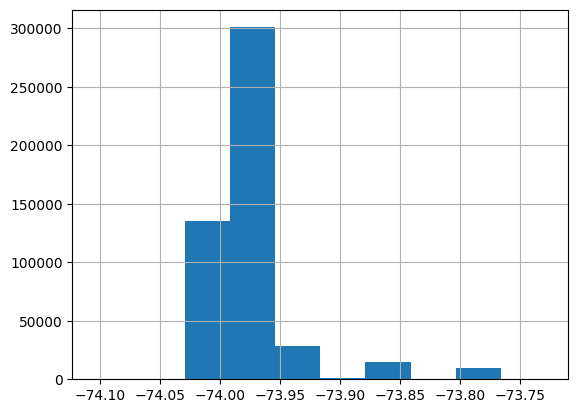

In [145]:
describe("pickup_longitude")

count    491292.000000
mean         40.750535
std           0.027587
min          40.575272
25%          40.736317
50%          40.752998
75%          40.768681
max          40.901421
Name: pickup_latitude, dtype: float64
{40.7177963256836, 40.7380714416504, 40.6968002319336, 40.7482414245605, 40.6467895507812, 40.7330055236816, 40.7825660705566, 40.7736663818359, 40.7755928039551, 40.7224922180176, 40.7861175537109, 40.7681846618652, 40.7933311462402, 40.7416572570801, 40.7467765808105, 40.7666015625, 40.7557258605957, 40.7123947143555, 40.7344703674316, 40.7611808776855, 40.7022285461426, 40.780387878418, 40.6446838378906, 40.7284126281738, 40.7261657714844, 40.7289962768555, 40.7746887207031, 40.7209510803223, 40.7525787353516, 40.7562408447266, 40.7672309875488, 40.7381477355957, 40.7479248046875, 40.7510147094727, 40.7699394226074, 40.7407836914062, 40.7339973449707, 40.7437934875488, 40.7518692016602, 40.7300643920898, 40.7432403564453, 40.7625160217285, 40.7577667236328, 40.7253

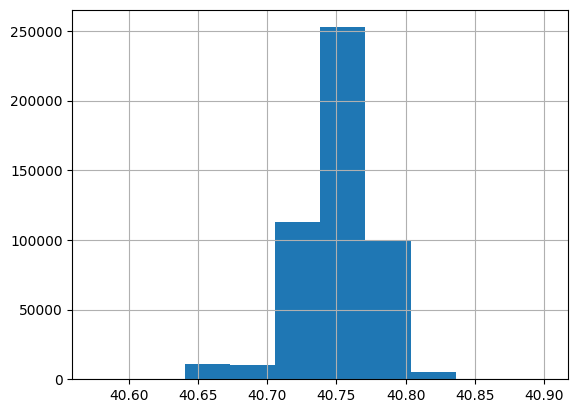

In [146]:
describe("pickup_latitude")

count    491292.000000
mean        -73.973544
std           0.033461
min         -74.242378
25%         -73.991577
50%         -73.979866
75%         -73.963333
max         -73.701439
Name: dropoff_longitude, dtype: float64
{-73.9827117919922, -73.9612503051758, -73.9516220092773, -73.9912948608398, -74.0020980834961, -74.0028076171875, -74.0078125, -73.9795074462891, -73.9832229614258, -73.9840621948242, -73.9866180419922, -73.9593124389648, -73.9731369018555, -73.9980163574219, -73.9872665405273, -73.9741592407227, -73.9598083496094, -73.9902420043945, -73.9700622558594, -73.966911315918, -73.9951248168945, -73.9482040405273, -74.0000915527344, -73.9614181518555, -73.9934005737305, -73.9874496459961, -73.7904739379883, -73.9855804443359, -73.8652496337891, -73.997184753418, -73.9511871337891, -73.9679718017578, -73.9988784790039, -73.9860610961914, -73.952880859375, -73.9945678710938, -73.9918212890625, -73.9682006835938, -73.9452514648438, -73.9669342041016, -73.9701690673828, -73.9

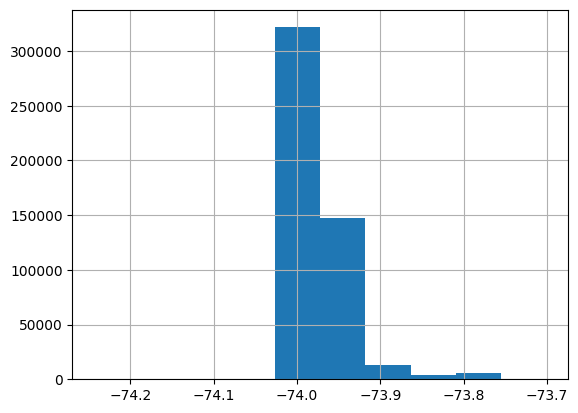

In [147]:
describe("dropoff_longitude")

count    491292.000000
mean         40.751074
std           0.031820
min          40.502365
25%          40.734570
50%          40.753632
75%          40.770138
max          40.911293
Name: dropoff_latitude, dtype: float64
{40.7319564819336, 40.7568702697754, 40.7500610351562, 40.7247657775879, 40.7800903320312, 40.7396697998047, 40.7505836486816, 40.7931861877441, 40.7941474914551, 40.7279853820801, 40.7803802490234, 40.7453193664551, 40.7501068115234, 40.7416572570801, 40.6448822021484, 40.7606773376465, 40.7890205383301, 40.7603302001953, 40.7179756164551, 40.7706985473633, 40.7137107849121, 40.7523307800293, 40.7610893249512, 40.6935844421387, 40.7614669799805, 40.7640419006348, 40.7472839355469, 40.7303276062012, 40.7725944519043, 40.7594909667969, 40.7566299438477, 40.7504577636719, 40.7786026000977, 40.8062858581543, 40.770450592041, 40.7109184265137, 40.7698402404785, 40.7682266235352, 40.7827911376953, 40.734317779541, 40.7259902954102, 40.722599029541, 40.6874160766602, 40.77

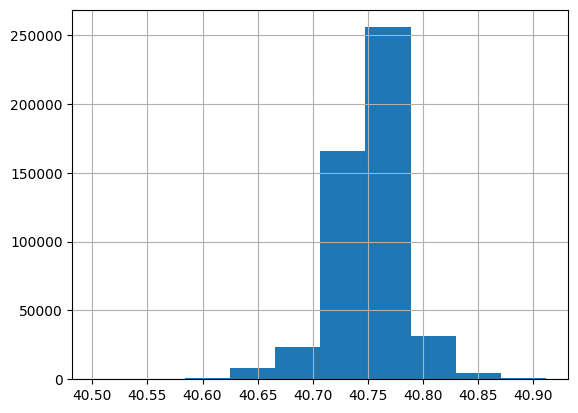

In [148]:
describe("dropoff_latitude")

Longitude in both cases is centered around -74 and latitude is centered around 40.75.

count    491292.000000
mean          1.526115
std           0.499318
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: vendor_id, dtype: float64
{1, 2}


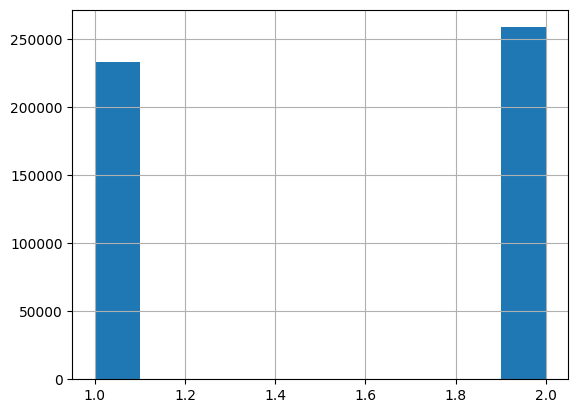

In [149]:
describe("vendor_id")

The second provider gave more rides than the first one by a small margin relatively speaking.

count    491292.000000
mean          1.641301
std           1.293645
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: passenger_count, dtype: float64
{0, 1, 2, 3, 4, 5, 6, 8}


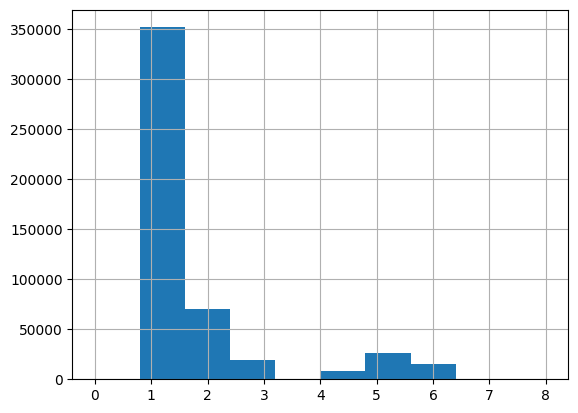

In [150]:
describe("passenger_count") 

As we see, mayority of rides are for single passengers by a big margin.

In [35]:
data.loc[data["passenger_count"]==0] 

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
31975,1,1.00,22,5,19,132,4,680,1,MN20,1,MN13,-73.974129,40.747021,-74.000969,40.746284,1,0,1.9,10.0,MN20-MN13
51074,1,2.65,0,5,20,140,5,335,1,MN17,1,MN23,-73.979805,40.755161,-73.994934,40.734486,1,0,1.6,13.0,MN17-MN23
324287,1,0.02,15,5,21,147,5,2771,3,BK64,4,QN98,-73.964798,40.681023,-73.790825,40.644417,1,0,11.1,58.0,BK64-QN98


We believe there should not be any rides with 0 passengers, so in future steps we would consider removing these rows.

count    4.912920e+05
mean     2.813226e+01
std      1.712510e+04
min      0.000000e+00
25%      1.100000e+00
50%      1.830000e+00
75%      3.400000e+00
max      1.200000e+07
Name: trip_distance, dtype: float64
{0.9, 1.4, 1.14, 3.7, 3.4, 1.28, 3.0, 2.27, 1.6, 1.96, 1.27, 11.74, 3.5, 1.92, 14.8, 1.0, 12.7, 3.76, 18.1, 2.0, 2.84, 13.5, 1.09, 0.6, 0.5, 0.75, 1.1, 1.19, 2.19, 2.93, 0.7, 1.03, 1.78, 1.2, 1.21, 2.8, 3.2, 4.7, 5.54, 5.3, 7.3, 1.56, 0.66}


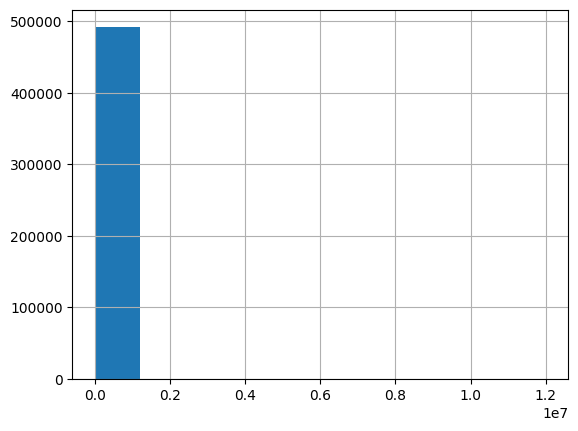

In [152]:
describe("trip_distance")

As we see as before there are outliers where the distance is 0 and where the distance is very large.

<Axes: >

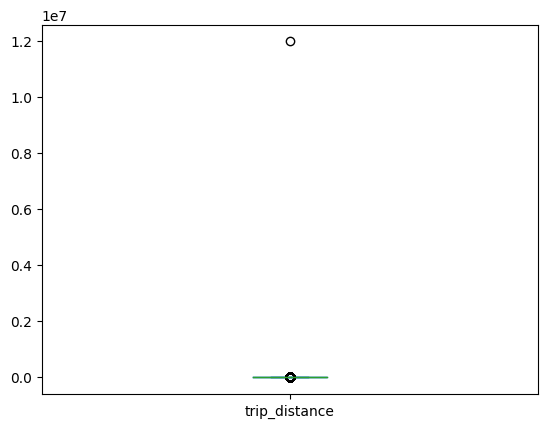

In [36]:
data["trip_distance"].plot.box()

We see a big outlier, for now the only reasonable explanation we have for it is that it was a missinput.

In [39]:
data=data.loc[data["trip_distance"]<100]

count    341006.000000
mean         13.256248
std           9.924889
min           2.500000
25%           7.000000
50%          10.000000
75%          15.500000
max         150.000000
Name: fare_amount, dtype: float64
{4.5, 5.0, 5.5, 6.5, 7.5, 7.0, 8.5, 10.0, 11.5, 9.5, 12.0, 9.0, 15.0, 12.5, 17.0, 17.5, 20.5, 21.0, 4.0, 18.5, 24.5, 20.0, 26.0, 6.0, 8.0, 41.5, 10.5, 52.0, 11.0, 14.0}


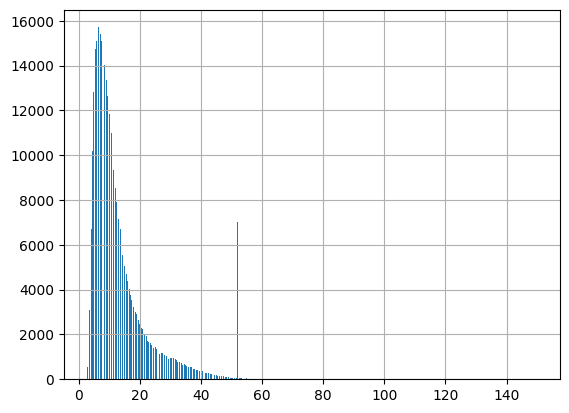

In [40]:
describe("fare_amount", 500)

We see mayority of the fares are in the lower values. We have an interesting spike at around the 50 dollars, which is the cost of a cab to JFK airport. We will explore this later on in this file.

In [41]:
data["pair"].describe()

count        341006
unique         4464
top       MN17-MN17
freq           9945
Name: pair, dtype: object

## Linear model to identify outliers

We decided to create a linear model in order to help identify the outliers with the lenght of the trip or its distance. As the fare is the result of the cab fee (once you enter) plus some amount given the time and distance you drive, we decided to use the linear model to predict what the fare should be. Below we first get rid of the outliers for training the model:

In [42]:
df = data.loc[data["length_time"]<data["length_time"].quantile(0.995)]
df = df.loc[df["length_time"]>df["length_time"].quantile(0.005)]
df = df.loc[df["trip_distance"]<df["trip_distance"].quantile(0.995)]
df = df.loc[df["trip_distance"]>df["trip_distance"].quantile(0.005)]

Now we make a simple linear regression and retrieve the coefficients and intercept to create 'predicted_fare' variable. Finally we create 'pred_diff' to check for major differences between the paid fare and the model prediction:

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[["trip_distance", "length_time"]]
y = df["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.coef_#
#model.intercept_

data['predicted_fare'] = data['trip_distance']*model.coef_[0] + data['length_time']*model.coef_[1] + model.intercept_
data['pred_diff'] = data['predicted_fare'] - data['fare_amount']

C:\Users\krzyz\AppData\Local\Temp\ipykernel_24336\2729648030.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_fare'] = data['trip_distance']*model.coef_[0] + data['length_time']*model.coef_[1] + model.intercept_
C:\Users\krzyz\AppData\Local\Temp\ipykernel_24336\2729648030.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pred_diff'] = data['predicted_fare'] - data['fare_amount']


As we can see in general the predicted fare is very close to the actual fare_amount:

In [44]:
data[['fare_amount', 'predicted_fare', 'pred_diff']].head()

,fare_amount,predicted_fare,pred_diff
0,7.0,6.895083,-0.104917
1,10.0,9.666208,-0.333792
2,11.5,10.300327,-1.199673
3,7.5,7.809471,0.309471
4,7.5,7.751622,0.251622


And when sorted we can see the outliers being identified. For example a trip distance of 12000000 makes the predicted fare far off what was actually paid. Similarly it works for super short or long rides in terms of time. To identify which values of pred_diff are that of outliers the distribution of pred_diff needs to be examined:

In [45]:
data.sort_values(by='pred_diff', ascending=False)

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff
65927,1,1.06,18,5,21,142,7,602,1,MN13,1,MN17,-73.993378,40.736374,-73.988358,40.745796,1,2,50.00,5.0,MN13-MN17,102.552760,97.552760
80977,1,8.75,11,5,20,136,1,4069,4,QN98,1,MN13,-73.789558,40.643829,-73.995811,40.753170,2,1,31.33,52.0,QN98-MN13,86.914970,34.914970
281611,1,1.00,12,5,22,148,6,3808,1,MN17,1,MN01,-73.980438,40.765755,-73.926613,40.865723,1,1,8.60,7.5,MN17-MN01,41.309825,33.809825
47368,1,12.55,18,5,20,137,2,4232,1,MN23,4,QN98,-73.999001,40.734348,-73.787132,40.644672,1,1,30.20,52.0,MN23-QN98,85.690851,33.690851
149577,1,11.65,8,5,18,122,1,3336,1,MN17,4,QN98,-73.986694,40.759766,-73.776451,40.645115,1,2,32.80,52.0,MN17-QN98,85.419437,33.419437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331557,1,16.06,1,5,19,132,4,255,1,MN17,1,MN17,-73.982895,40.761055,-73.982887,40.761066,2,1,0.45,80.0,MN17-MN17,4.452047,-75.547953
137848,1,29.30,8,5,22,151,2,142,1,MN23,1,MN23,-73.999680,40.731144,-73.995003,40.731258,1,2,0.30,85.0,MN23-MN23,3.491490,-81.508510
281049,1,21.17,14,5,19,133,5,232,4,QN99,4,QN98,-73.843056,40.762657,-73.864807,40.770351,2,1,2.16,100.0,QN99-QN98,7.630246,-92.369754
288803,1,5.00,22,5,19,129,1,120,1,MN04,1,MN04,-73.951202,40.825226,-73.949921,40.827423,1,1,0.20,110.0,MN04-MN04,3.167253,-106.832747


Here we can see that in general the difference is very close to 0. Sometimes bigger differences are produced on long rides. We excluded the fares equal to 52 here as the airport rides skew the fare that is paid (usually they pay way less then what they would for the same length/distance)

In [46]:
df = data.loc[data['pred_diff']<data['pred_diff'].quantile(0.995)]
df = df.loc[df['pred_diff']>df['pred_diff'].quantile(0.005)]
df = df.loc[df['fare_amount']!=52]
df['pred_diff'].describe()

count    333758.000000
mean          0.036769
std           0.604420
min          -3.997960
25%          -0.237182
50%           0.041926
75%           0.322986
max           5.526662
Name: pred_diff, dtype: float64

<Axes: >

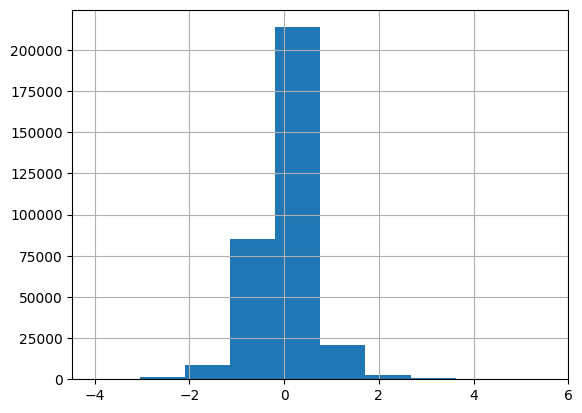

In [47]:
df['pred_diff'].hist()

Based on this we can come up with threshold for outliers, for example a bound [-4,4] could be a potentiall proposal. Every ride with values outside of this bound should be treated as an outlier and deleted or imputed for modelling purposes. However, here we do not delete any observations, nor do we try to impute the outliers, as we do not know which part of the fare equation is wrong - the time of the trip, the distance, or the fare. 

## Checking if structural constraints are met

### Taxi Fare constraint

In the following link: https://www.nytimes.com/2022/11/17/nyregion/taxi-fare-hike-nyc.html we found information about the taxi rates of the period 2012-2022, which includes our period of interest May 2015.



#### JFK trips

Every ride from or to JFK costs 52 dollars. We should check that this is actually true for all data points. JFK's coordinates are 40.6446° N, 73.7797° W. Despite this we need to know the range of coordinates from which taxis start or end their trip which is still considered JFK according to fares.  
First, using Google maps, I created a large rectangle with the coordinates which for sure includes all of JFK. Then, looking at the pickup trips that have fares which are exactly $52, the fare for the airport, I found the minimum and maximum lognitudes and latitudes of the JFK area. 

In [48]:
pickup_mask = (data["pickup_longitude"] > -73.79) &  (data["pickup_longitude"] < -73.76 ) &  (data["pickup_latitude"] > 40.6 ) &  (data["pickup_latitude"] <40.66  )
airport_pickup = data.loc[(data["fare_amount"] == 52) & (pickup_mask)]

JFK_min_long = min(airport_pickup["pickup_longitude"])
JFK_max_long = max(airport_pickup["pickup_longitude"])
JFK_min_lat = min(airport_pickup["pickup_latitude"])
JFK_max_lat = max(airport_pickup["pickup_latitude"])

airport_pickup_dropoff_mask =  ((data["pickup_longitude"] >= JFK_min_long) & (data["pickup_longitude"] <= JFK_max_long) &  (data["pickup_latitude"] >= JFK_min_lat ) &  (data["pickup_latitude"] <= JFK_max_lat)) |(data["dropoff_longitude"] > JFK_min_long) & (data["dropoff_longitude"] < JFK_max_long) &  (data["dropoff_latitude"] > JFK_min_lat ) &  (data["dropoff_latitude"] <JFK_max_lat)
airport_pickup_mask =  (data["pickup_longitude"] >= JFK_min_long) & (data["pickup_longitude"] <= JFK_max_long) &  (data["pickup_latitude"] >= JFK_min_lat )  &  (data["pickup_latitude"] <= JFK_max_lat)
airport_dropoff_mask = (data["dropoff_longitude"] >= JFK_min_long) & (data["dropoff_longitude"] <= JFK_max_long) &  (data["dropoff_latitude"] >= JFK_min_lat ) &  (data["dropoff_latitude"] <= JFK_max_lat)

#Rides to and from the airport
data.loc[ (data["fare_amount"] == 52) & airport_pickup_dropoff_mask]

# JFK_max_lat, JFK_min_lat, JFK_max_long, JFK_min_long

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff
17,1,5.00,13,5,19,130,2,3170,4,QN98,1,MN17,-73.786415,40.644684,-73.986954,40.761089,1,2,18.10,52.0,QN98-MN17,55.942134,3.942134
130,1,11.65,14,5,20,140,5,2925,4,QN98,1,MN19,-73.784149,40.648548,-73.970306,40.752476,1,1,16.80,52.0,QN98-MN19,51.970074,-0.029926
168,1,11.67,15,5,22,149,7,2129,1,MN19,4,QN98,-73.975548,40.752483,-73.789383,40.642071,2,1,16.12,52.0,MN19-QN98,45.933715,-6.066285
207,1,11.67,13,5,20,140,5,3882,4,QN98,1,MN23,-73.788612,40.642467,-74.007500,40.735443,2,1,19.62,52.0,QN98-MN23,63.108772,11.108772
333,1,11.65,13,5,20,136,1,2763,4,QN98,1,MN01,-73.786224,40.642040,-73.919495,40.871880,1,1,23.00,52.0,QN98-MN01,63.027415,11.027415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343549,1,7.00,17,5,18,123,2,3637,4,QN98,1,MN23,-73.781143,40.644955,-74.000572,40.735374,1,1,18.90,52.0,QN98-MN23,60.260940,8.260940
343631,1,10.00,14,5,19,128,7,3178,4,QN98,1,MN12,-73.781898,40.644741,-73.982727,40.781826,1,3,21.40,52.0,QN98-MN12,62.386017,10.386017
343657,1,11.67,16,5,18,123,2,3768,1,MN17,4,QN98,-73.989250,40.757092,-73.782570,40.644089,2,1,16.98,52.0,MN17-QN98,57.315865,5.315865
343670,1,10.55,17,5,20,136,1,3388,4,QN98,1,MN25,-73.789925,40.645184,-74.004501,40.708736,1,1,15.50,52.0,QN98-MN25,52.194694,0.194694


Below I am plotting two plots:  
+ In the first one, I plotted in blue the location of the dropoffs of rides we assume are going to the airport and have the regular flat fare of 52 dollars. In red, I plotted the location of the dropoffs of rides we assume are going to the airport but haven't paid 52 dollars.  
+ In the second plot, I have plotted the exact same thing but for rides which had the airport as a pickup and not as a dropoff location.      


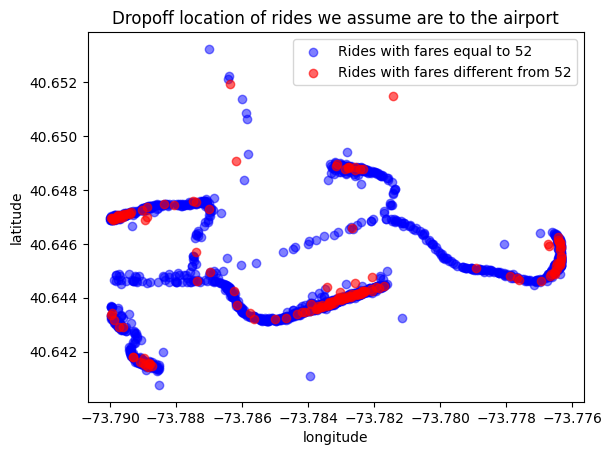

In [49]:
plt.scatter(data.loc[(data["fare_amount"] == 52) & (airport_dropoff_mask)]['dropoff_longitude'],data.loc[(data["fare_amount"] == 52) & (airport_dropoff_mask)]['dropoff_latitude'], color = 'blue', label = "Rides with fares equal to 52", alpha = 0.5)
plt.scatter(data.loc[(data["fare_amount"] != 52) & (airport_dropoff_mask)]['dropoff_longitude'],data.loc[(data["fare_amount"] != 52) & (airport_dropoff_mask)]['dropoff_latitude'], color = 'red', label = "Rides with fares different from 52", alpha = 0.6)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Dropoff location of rides we assume are to the airport')
plt.legend()

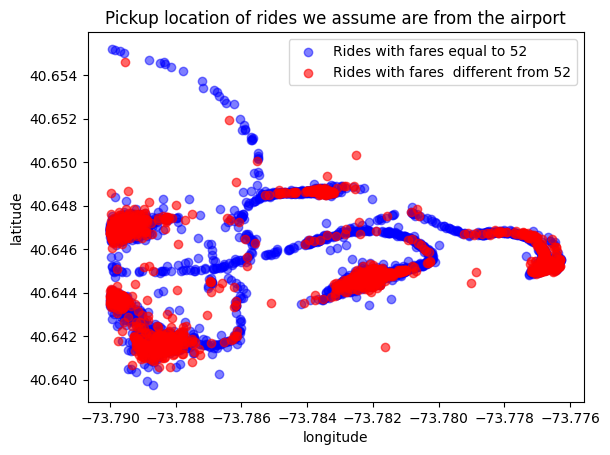

In [165]:

plt.scatter(data.loc[(data["fare_amount"] == 52) & (airport_pickup_mask)]['pickup_longitude'],data.loc[(data["fare_amount"] == 52) & (airport_pickup_mask)]['pickup_latitude'], color = 'blue', label = "Rides with fares equal to 52", alpha = 0.5)
plt.scatter(data.loc[(data["fare_amount"] != 52) & (airport_pickup_mask)]['pickup_longitude'],data.loc[(data["fare_amount"] != 52) & (airport_pickup_mask)]['pickup_latitude'], color = 'red', label = "Rides with fares  different from 52", alpha = 0.6)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Pickup location of rides we assume are from the airport')
plt.legend()


In both these plots, we see that the red and blue rides are generally concentrated around the same lines, which most likely shows the taxi area in JFK. One possible explanation for the rides not priced at 52 dollars (the red ones) is that the taxi driver did not select the flat rate in the taximeter. Now, I test whether these non-52 dollars taxi rides to and from the airport can be predicted using the linear model previously explained, which performed really well for generic rides.


In [166]:
data_copy = data.copy(deep = True)
mispriced_rides = data_copy.loc[(data["fare_amount"] != 52) & (airport_pickup_dropoff_mask)]
mispriced_rides['pred_diff'].describe()

count    3199.000000
mean       -0.337527
std        13.773472
min       -76.877220
25%        -1.026425
50%        -0.052620
75%         0.745104
max       482.657081
Name: pred_diff, dtype: float64

From the distribution of the pred_diff we see that most of the fares of the taxi rides to the airport not using the flat fare, can be predicted using the linear model. This brings further evidence that these rides were using the taximeter in the normal setting. We can also see that the minimum and the maximum difference between the predicted fare and the fare amount are quite large. This  most likely is due to certain rides with outliers in trip_distance and/or length_time as the linear model was created to predict only the more general cases. 

#### Minimum fare constraint
According to the article above, from 2012-2022, the base fair was 2.5 dollars so no trip can be less than that. As you can see below, in the dataset there are three trips that have a fare smaller than 2.5 dollars. Later on, during preprocessing, these rows will most likely be needed to be deleted as they don't satisfy the constraints of their variables. That also follows from the intercept found by the linear model - 2.16 - which is very close to the actual 2.5 dollar value.

In [167]:
data.loc[ data["fare_amount"] < 2.5 ]

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff
378073,0,5,20,140,5,7,3,BK38,3,BK38,-73.985947,40.689850,-73.985947,40.689850,2,1,0.0,1.70,BK38-BK38,2.210699,0.510699
387027,1,5,20,140,5,98,1,MN19,1,MN19,-73.966599,40.754025,-73.966591,40.754025,1,1,0.0,0.01,MN19-MN19,2.741929,2.731929
393055,13,5,21,144,2,2276,1,MN99,4,QN98,-73.958427,40.800171,-73.786880,40.647285,1,1,18.0,0.01,MN99-QN98,50.116948,50.106948


# Checking column types

In [168]:
data.dtypes

pickup_hour            int64
pickup_month           int64
pickup_week            int64
pickup_day             int64
pickup_wday            int64
length_time            int64
pickup_boro_code       int64
pickup_nta_code       object
dropoff_boro_code      int64
dropoff_nta_code      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
vendor_id              int64
passenger_count        int64
trip_distance        float64
fare_amount          float64
pair                  object
predicted_fare       float64
pred_diff            float64
dtype: object

## pickup_day Check
Since all the dates are in the month of May, pickup_day can only have values of a certain range.
All of our data come from May 2015. Since 2015 is not a leap year, February has 28 days, and of course January, March, and May have 31 while April has 30. By adding up these values we find what day of the year the 1st and the 31st of May are. 

In [169]:
min_may = 31+28+31+30+1 #1st of May
max_may = 31+28+31+30+31 #31st of May
min_may, max_may

(121, 151)

count    491292.000000
mean        136.342308
std           8.667126
min         122.000000
25%         129.000000
50%         136.000000
75%         144.000000
max         152.000000
Name: pickup_day, dtype: float64
{128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 122, 123, 124, 125, 126, 127}


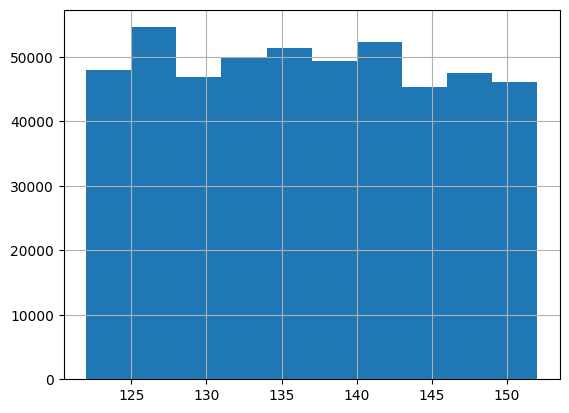

In [170]:
describe("pickup_day")

We see that the maximum pickup_day is 1 value higher than the day of the year that the 31st May is, which suggests that this variable is inflated by 1. This is also supported by the fact that otherwise there would be no rides on the 1st of May which would be surprising in such a large database. A reason behind these issue can be the fact that the day of the year is calculated as if the year was a leap year.

count    491292.000000
mean        135.342308
std           8.667126
min         121.000000
25%         128.000000
50%         135.000000
75%         143.000000
max         151.000000
Name: pickup_day, dtype: float64
{128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 121, 122, 123, 124, 125, 126, 127}


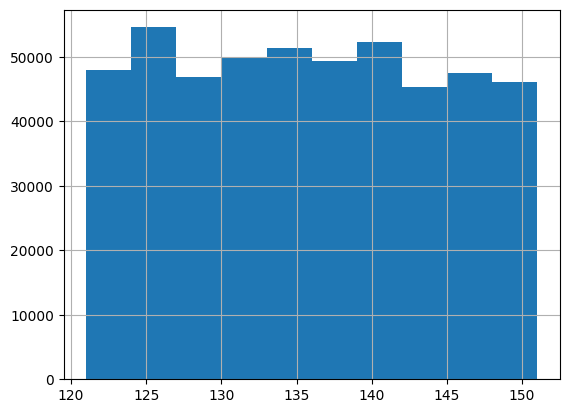

In [171]:
data["pickup_day"] = data["pickup_day"].apply(lambda x: x-1)
describe("pickup_day")

## Creating a date/time variable

The first 5 columns describe the time at which the ride took place with the accuracy to the closest hour at which ride initiated (we hypothesize here it may be different). 3 of them can be leveraged to obtain a datetime variable, reducing the neccesary size to store the same information, as we know the year is 2015. The week number and weekday can be deducted from the datetime variable, so we can also check their validity.

In [50]:
data['pickup_datetime'] = pd.to_datetime('2015' + '-' 
                                         + data['pickup_month'].astype(str) + '-' 
                                         + (data['pickup_day']).astype(str) + ' ' 
                                         + data['pickup_hour'].astype(str) + ':00:00', 
                                         format = '%Y-%m-%j %H:%M:%S')

data

C:\Users\krzyz\AppData\Local\Temp\ipykernel_24336\2490187632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pickup_datetime'] = pd.to_datetime('2015' + '-'


,weight,response,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime
0,1,1.75,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19,6.895083,-0.104917,2015-05-12 18:00:00
1,1,2.95,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24,9.666208,-0.333792,2015-05-07 18:00:00
2,1,2.46,7,5,19,132,4,1016,1,MN25,1,MN27,-74.012741,40.702229,-73.998878,40.713711,2,1,1.14,11.5,MN25-MN27,10.300327,-1.199673,2015-05-12 07:00:00
3,1,1.66,11,5,20,134,6,550,1,MN99,1,MN20,-73.970909,40.767231,-73.979507,40.752331,2,1,1.28,7.5,MN99-MN20,7.809471,0.309471,2015-05-14 11:00:00
4,1,1.75,20,5,19,128,7,501,1,MN20,1,MN22,-73.973869,40.747925,-73.986618,40.730328,1,1,1.40,7.5,MN20-MN22,7.751622,0.251622,2015-05-08 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343741,1,2.00,20,5,21,145,3,740,1,MN12,1,MN36,-73.978676,40.783512,-73.938370,40.850533,2,1,5.84,18.5,MN12-MN36,17.774448,-0.725552,2015-05-25 20:00:00
343742,1,1.00,23,5,21,141,6,193,1,MN14,1,MN12,-73.982048,40.775452,-73.976860,40.783520,2,6,0.70,4.5,MN14-MN12,4.569122,0.069122,2015-05-21 23:00:00
343743,1,2.35,19,5,19,132,4,764,1,MN20,1,MN22,-73.974472,40.747253,-73.983070,40.726955,1,1,1.70,10.0,MN20-MN22,9.892054,-0.107946,2015-05-12 19:00:00
343744,1,2.65,21,5,20,140,5,955,1,MN13,1,MN27,-73.993607,40.745293,-73.987350,40.722256,1,1,2.20,12.0,MN13-MN27,11.993370,-0.006630,2015-05-20 21:00:00


## pickup_week Check

As we now have the pickup_datetime we can check whether the week numbers are correctly assigned in the dataset, using built in python methods for the datetime object:

In [173]:
df = data.copy()

df['week_number'] = df['pickup_datetime'].apply(lambda x: x.isocalendar()[1])
df['week_check'] = df['pickup_week'] - df['week_number']
df['week_check'].sum()

-136532

As we can see there are some issues with how week numbers are assigned

In [174]:
df[['pickup_week', 'week_number', 'week_check']].head()

,pickup_week,week_number,week_check
0,19,20,-1
1,21,22,-1
2,19,19,0
3,22,22,0
4,21,21,0


I will run a couple checks to see where dates do not align:

In [175]:
df.loc[df['pickup_datetime'] == '2015-05-01'][['pickup_week', 'week_number', 'week_check']].head(1)

,pickup_week,week_number,week_check
284,18,18,0


In [176]:
df.loc[df['pickup_datetime'] == '2015-05-02'][['pickup_week', 'week_number', 'week_check']].head(1)

,pickup_week,week_number,week_check
418,18,18,0


In [177]:
df.loc[df['pickup_datetime'] == '2015-05-03'][['pickup_week', 'week_number', 'week_check']].head(1)

,pickup_week,week_number,week_check
1079,18,18,0


In [178]:
df.loc[df['pickup_datetime'] == '2015-05-04'][['pickup_week', 'week_number', 'week_check']].head(1)

,pickup_week,week_number,week_check
856,18,19,-1


In [179]:
df.loc[df['pickup_datetime'] == '2015-05-05'][['pickup_week', 'week_number', 'week_check']].head(1)

,pickup_week,week_number,week_check
1894,18,19,-1


In [180]:
df.loc[df['pickup_datetime'] == '2015-05-06'][['pickup_week', 'week_number', 'week_check']].head(1)

,pickup_week,week_number,week_check
240,19,19,0


It seems to be some issue where it thinks may had 5 days not 3 in the first week. After reviewing the original dataset, as well as actual calendar from May 2015, it seems that indeed some of the 'pickup_week' entries are wrong. They actually follow a path of weeks given dates from 2013. Therefore, we decided to get rid of pickup_week columns and use the 'week_number' created below, so that weeks are that of May 2015. However, after deleting the column we change the name of 'week_number' back to the original, making sure it contains the correct values for every entry:

In [51]:
data['week_number'] = data['pickup_datetime'].apply(lambda x: x.isocalendar()[1])
data.drop(columns=['pickup_week'], axis=1, inplace=True)
data.rename(columns={'week_number': 'pickup_week'}, inplace=True)

C:\Users\krzyz\AppData\Local\Temp\ipykernel_24336\1644130938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week_number'] = data['pickup_datetime'].apply(lambda x: x.isocalendar()[1])
C:\Users\krzyz\AppData\Local\Temp\ipykernel_24336\1644130938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['pickup_week'], axis=1, inplace=True)
C:\Users\krzyz\AppData\Local\Temp\ipykernel_24336\1644130938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

## pickup_wday Check
Same analysis can be performed for week days, given the datetime column. We check the validity of the 'pickup_wday' compared to actual weekdays in the calendar:

In [52]:
df = data.copy()

df['day'] = df['pickup_datetime'].apply(lambda x: x.isocalendar()[2])
df['day_check'] = df['pickup_wday'] - df['day']
df['day_check'].sum()

-9952

Let's visualize what is the issue:

In [183]:
df.loc[df['pickup_datetime'] == '2015-05-01'][['pickup_wday', 'pickup_datetime', 'day']].head(1)

,pickup_wday,pickup_datetime,day
284,1,2015-05-01,5


In [184]:
df.loc[df['pickup_datetime'] == '2015-05-02'][['pickup_wday', 'pickup_datetime', 'day']].head(1)

,pickup_wday,pickup_datetime,day
418,2,2015-05-02,6


In [185]:
df.loc[df['pickup_datetime'] == '2015-05-03'][['pickup_wday', 'pickup_datetime', 'day']].head(1)

,pickup_wday,pickup_datetime,day
1079,3,2015-05-03,7


In [186]:
df.loc[df['pickup_datetime'] == '2015-05-04'][['pickup_wday', 'pickup_datetime', 'day']].head(1)

,pickup_wday,pickup_datetime,day
856,4,2015-05-04,1


It seems that the weekdays are just shifted. As in May 1st is weekday 1 - Monday - when actually its the 5th day in the calendar (confirmed with actual calendar as well). The following pattern continues for following days, with the 'pickup_wday' always being 4 days behind schedule. Kind of like using the calendar from May 2017 where the month indeed began on Monday. Therefore, we decide to clean using the same procedure as for week number:

In [53]:
data['weekday'] = data['pickup_datetime'].apply(lambda x: x.isocalendar()[2])
data.drop(columns=['pickup_wday'], axis=1, inplace=True)
data.rename(columns={'weekday': 'pickup_wday'}, inplace=True)

C:\Users\krzyz\AppData\Local\Temp\ipykernel_24336\909138396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weekday'] = data['pickup_datetime'].apply(lambda x: x.isocalendar()[2])
C:\Users\krzyz\AppData\Local\Temp\ipykernel_24336\909138396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['pickup_wday'], axis=1, inplace=True)
C:\Users\krzyz\AppData\Local\Temp\ipykernel_24336\909138396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

Finally we decided to change the weekday number to actual day names. We first add a column 'pickup_wday2' and confirm that the mapping 1: Monday, 2: Tuesday, etc:

In [188]:
data['pickup_wday2'] = data['pickup_datetime'].dt.strftime('%A')
data[['pickup_wday', 'pickup_wday2']].head()

,pickup_wday,pickup_wday2
0,1,Monday
1,1,Monday
2,3,Wednesday
3,3,Wednesday
4,3,Wednesday


In the end we get rid of the numerical version and change back the name:

In [54]:
data.drop(columns=['pickup_wday'], axis=1, inplace=True)
data.rename(columns={'pickup_wday2': 'pickup_wday'}, inplace=True)

C:\Users\krzyz\AppData\Local\Temp\ipykernel_24336\1853648382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['pickup_wday'], axis=1, inplace=True)
C:\Users\krzyz\AppData\Local\Temp\ipykernel_24336\1853648382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'pickup_wday2': 'pickup_wday'}, inplace=True)


This way the week days represent that of actual May 2015 not May 2017.

## Delete redundant datetime related columns

Now that we have the datetime column containg the information about month/day/hour there is no point in keeping the other 3 variables in the dataset:

In [190]:
data.drop(columns=['pickup_month', 'pickup_hour', 'pickup_day'], axis=1, inplace=True)

## Change type of vendor_id and pickup_week
Since vendor_id has only 2 possible values, it should be treated as categorical.
In this case same thing applies to pickup_week which has only 5 possible values. However if we were to have more weeks, ex. half a year or a year of weeks, then we could consider it numerical again.

In [191]:
data['vendor_id']=data['vendor_id'].map(str)
data['pickup_week']=data['pickup_week'].map(str)

# Plotting variables over time

Since we have created datetime variale, we can investigate the data over time and see whether there are any potential structure over time in the occurence of outliers. We should however note this is not a time series as multiple cabs operate at the same time and data overlaps, this however does not matter if we are only interested in outliers.

Outliers of time occur regularly with a kind of sinusoidal pattern

<Axes: xlabel='pickup_datetime'>

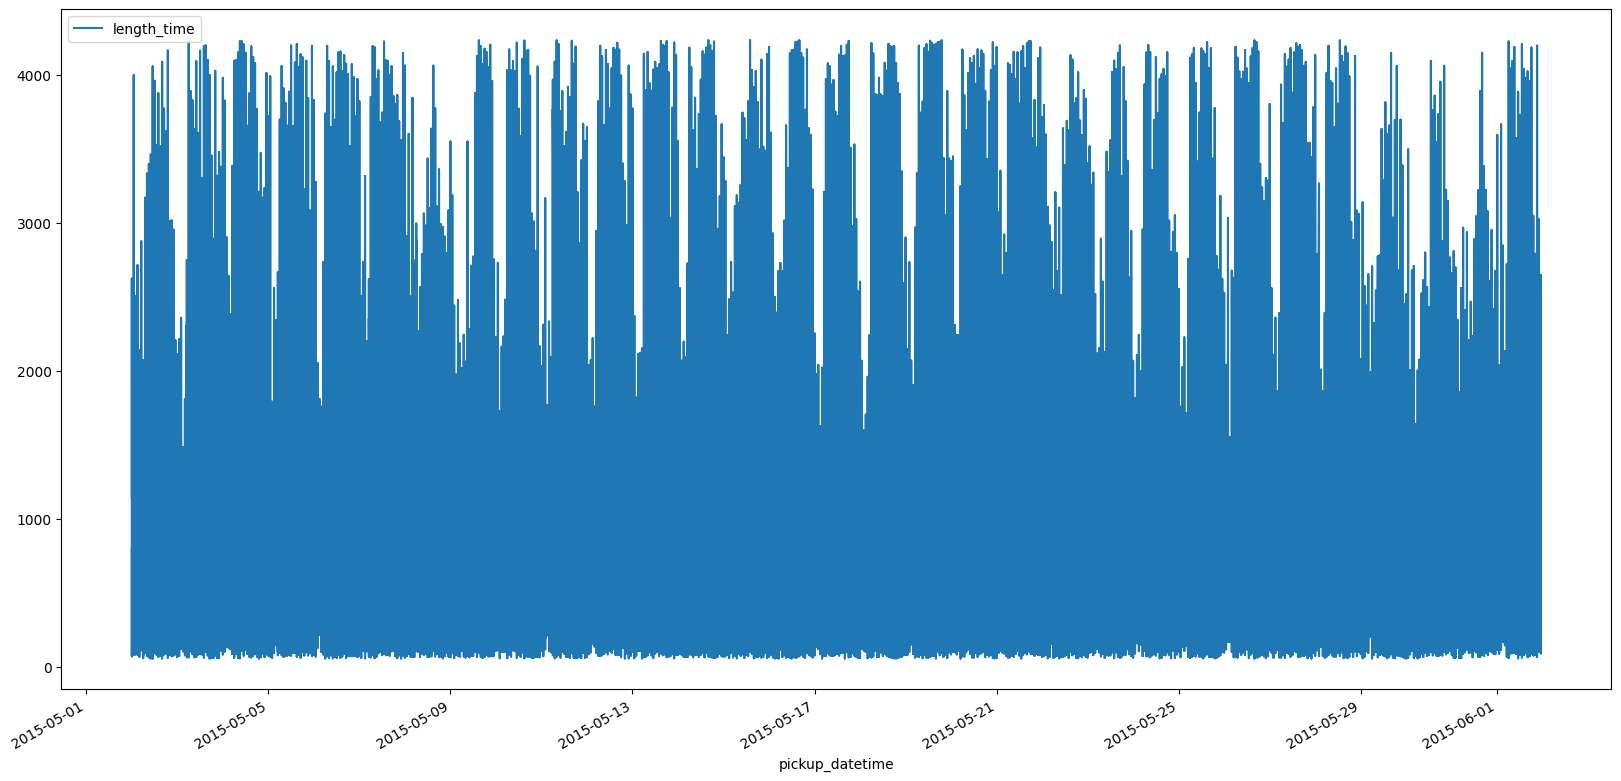

In [55]:
data.plot(x="pickup_datetime",y=["length_time"],figsize=(20, 10))

Outliers appear at random with regrads to time

<Axes: xlabel='pickup_datetime'>

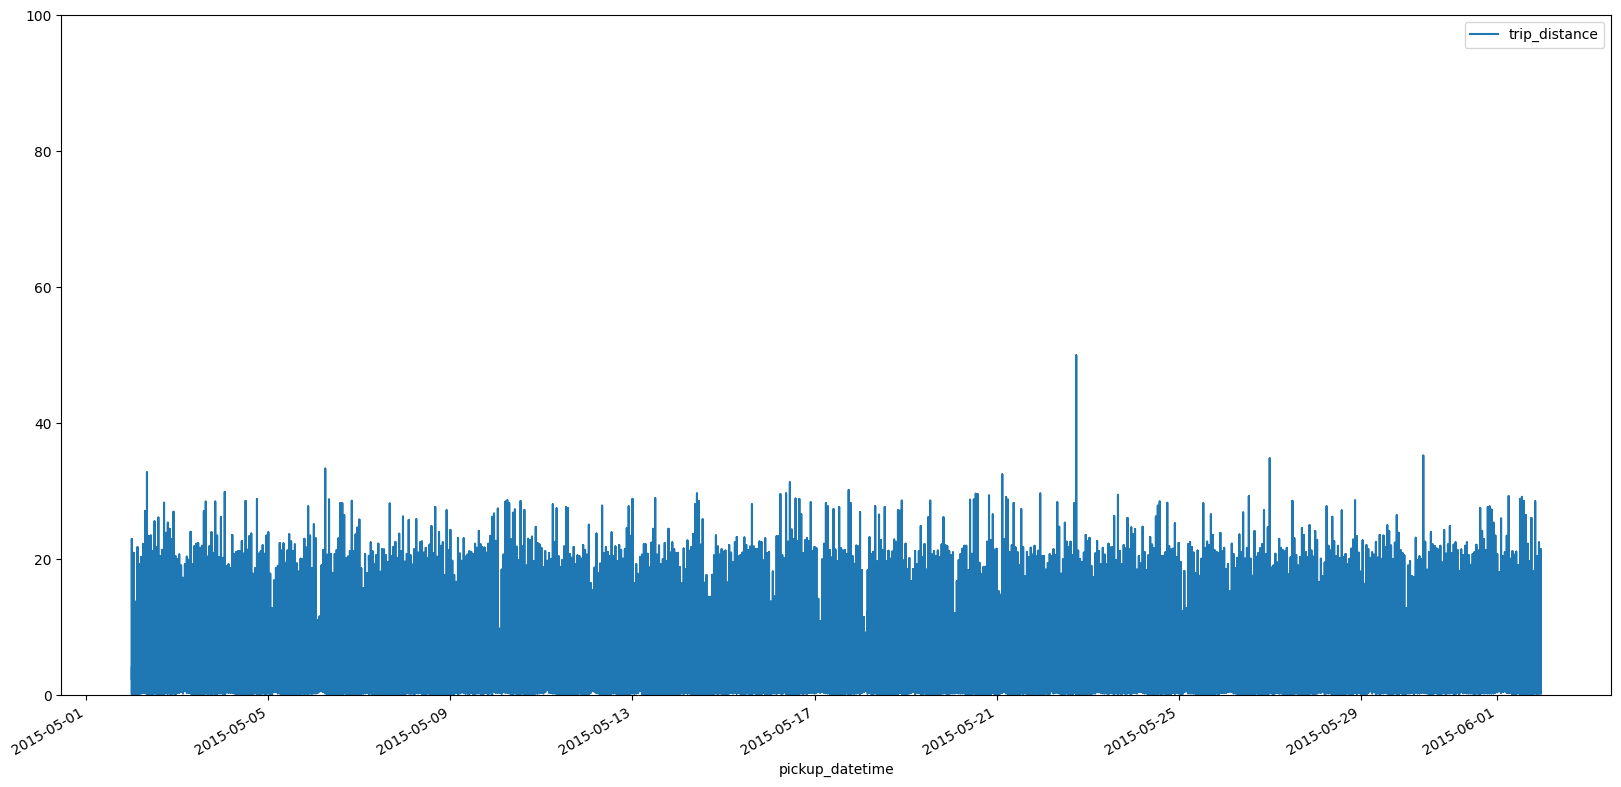

In [56]:
data.plot(x="pickup_datetime",y=["trip_distance"],figsize=(20, 10), ylim=[0,100])

Outliers appear at random with regards to fare

<Axes: xlabel='pickup_datetime'>

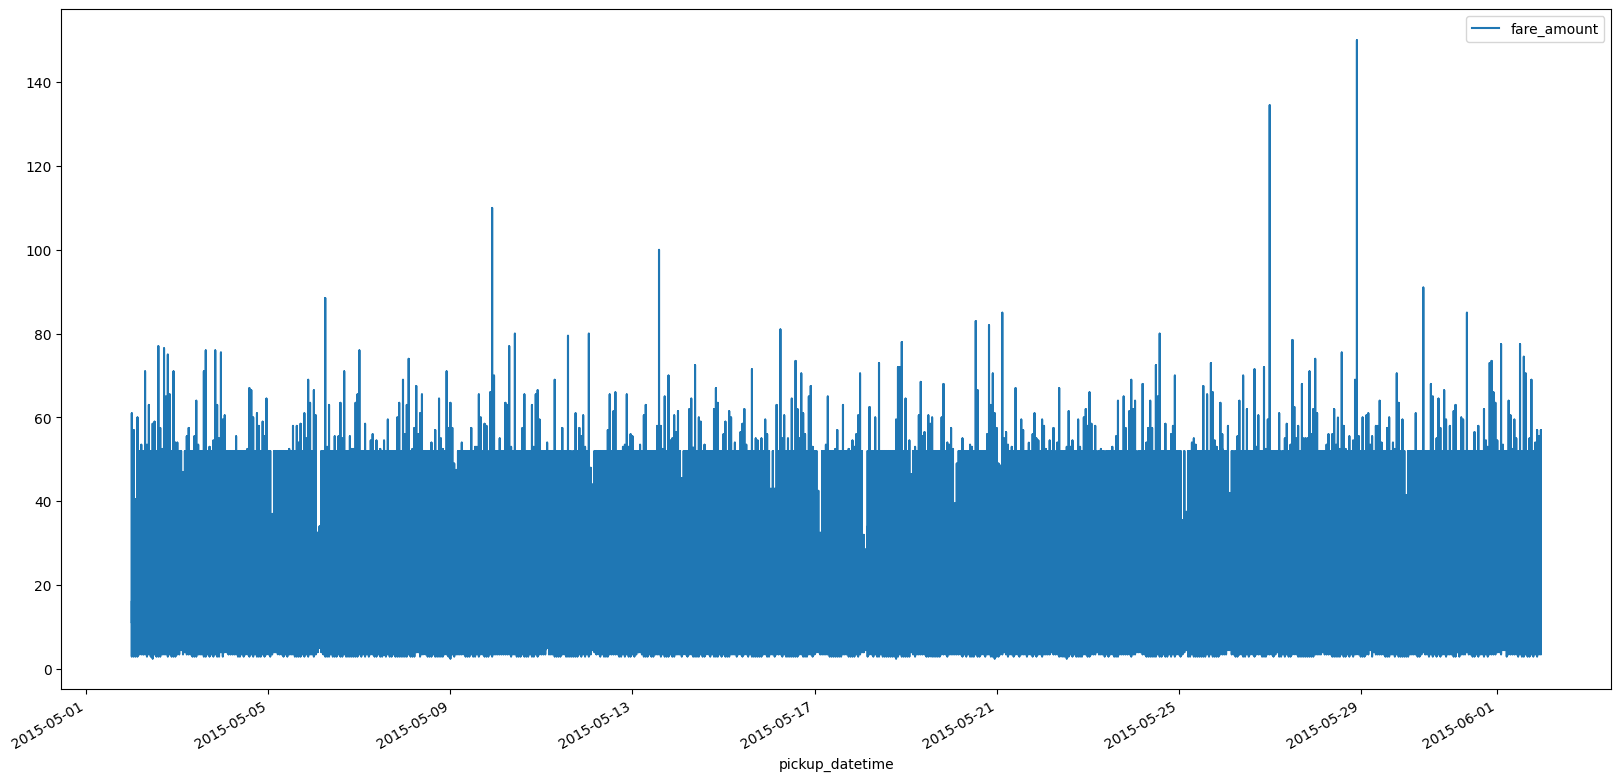

In [57]:
data.plot(x="pickup_datetime",y=["fare_amount"],figsize=(20, 10))

# Codes, Longitude and Latitude analysis

Enforce string type on nta codes

In [58]:
data.dtypes
data['pickup_nta_code']=data['pickup_nta_code'].map(str)
data['dropoff_nta_code']=data['dropoff_nta_code'].map(str)

C:\Users\krzyz\AppData\Local\Temp\ipykernel_24336\2364567289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pickup_nta_code']=data['pickup_nta_code'].map(str)
C:\Users\krzyz\AppData\Local\Temp\ipykernel_24336\2364567289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dropoff_nta_code']=data['dropoff_nta_code'].map(str)


Check if all Fares are inside of New York and the area around it

<Axes: xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

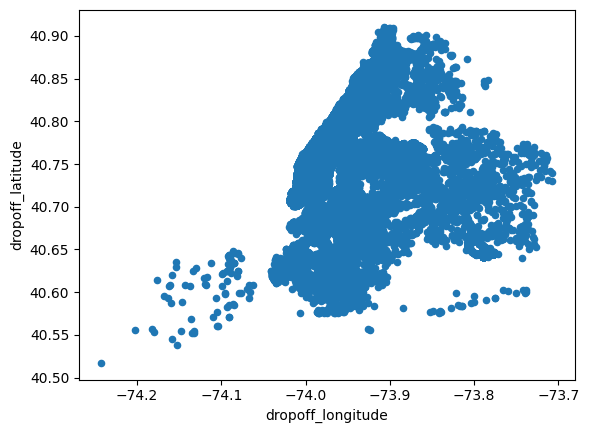

In [59]:
data.plot.scatter(x='dropoff_longitude',y='dropoff_latitude')

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

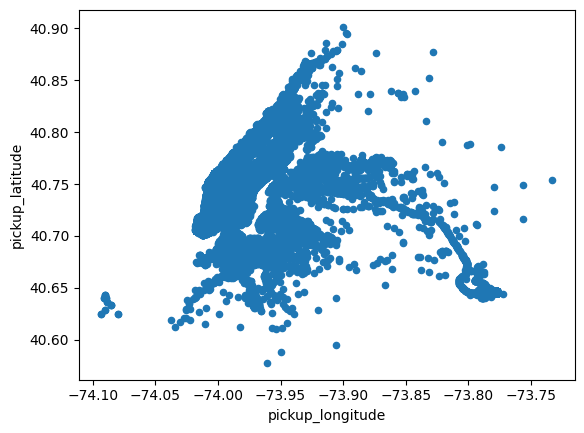

In [60]:
data.plot.scatter(x='pickup_longitude',y='pickup_latitude')

Since NTA and borough codes are based entirely on longitude and latitude, they should predict codes with above 99% accuracy

Pickup NTA only has 96.75% accuracy: residuals could be investigated to see if they are really wrong and if so if there is any pattern

In [61]:
import sklearn as sklearn
from sklearn import tree
classifier = tree.ExtraTreeClassifier(class_weight="balanced")
X = data[['pickup_longitude','pickup_latitude']]
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,data['pickup_nta_code'])
classifier.fit(X_train, Y_train)
classifier.score(X_test, Y_test)
print(classifier.score(X_test, Y_test)) 

0.961596208886595


In [65]:
predicted=classifier.predict(X)
data_code=data.copy()
data_code["predicted_nta"]=pd.Series(predicted)
diff_mask=pd.Series(predicted)!=data["pickup_nta_code"]
negative_mask=pd.Series(predicted)==data["pickup_nta_code"]


ValueError: Can only compare identically-labeled Series objects

In [63]:
def plot_difference(code):
    code_mask=data_code["pickup_nta_code"].str.contains((code))
    plt.clf()
    plt.scatter(data.loc[negative_mask & code_mask]['pickup_longitude'],data.loc[negative_mask & code_mask]['pickup_latitude'], color = 'blue', label = "nta predicted correctly", alpha = 0.5)
    plt.scatter(data.loc[diff_mask & code_mask]['pickup_longitude'],data.loc[diff_mask & code_mask]['pickup_latitude'], color = 'red', label = "nta predicted incorrectly", alpha = 0.6)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title('Map')
    plt.legend()

In [64]:
print(data_code[diff_mask]["pickup_nta_code"].value_counts()[0:20])


NameError: name 'diff_mask' is not defined

Most of the outliers find themselves at the border of areas. We therefore can conclude that code data is relaiable.

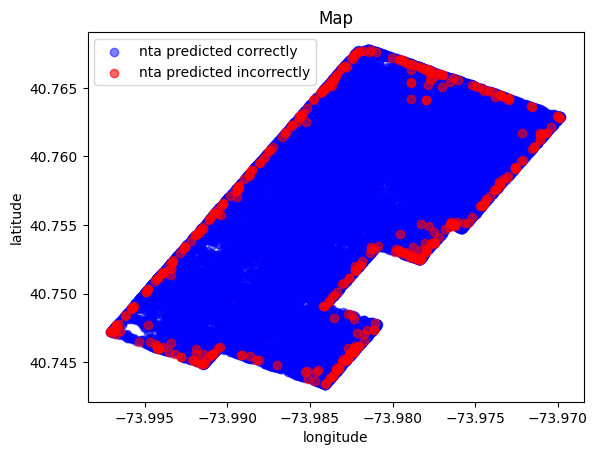

In [202]:
plot_difference("MN17")

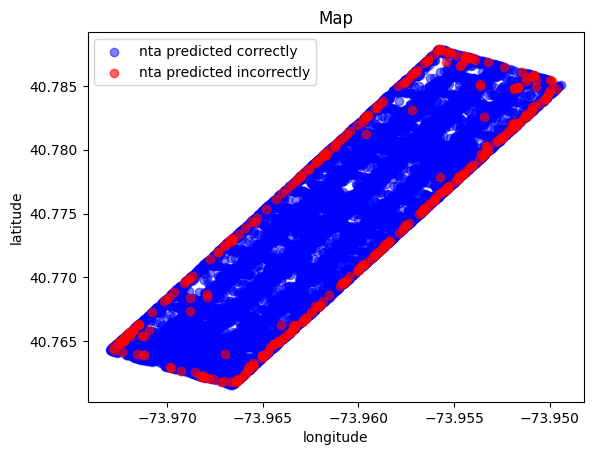

In [203]:
plot_difference("MN40")

MN99 is a code for all parks in Manhatan and this is why there are multiple clusters.

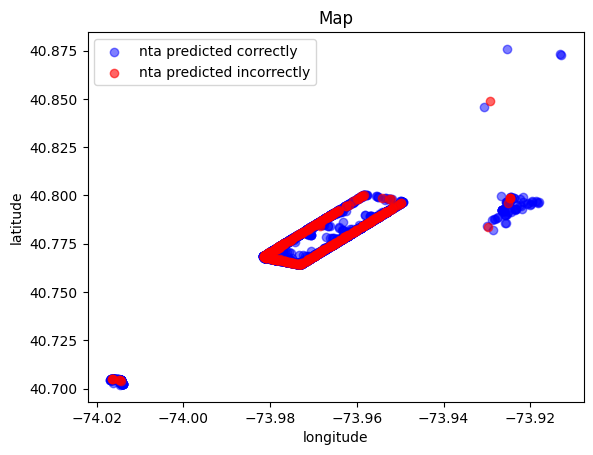

In [204]:
plot_difference("MN99")

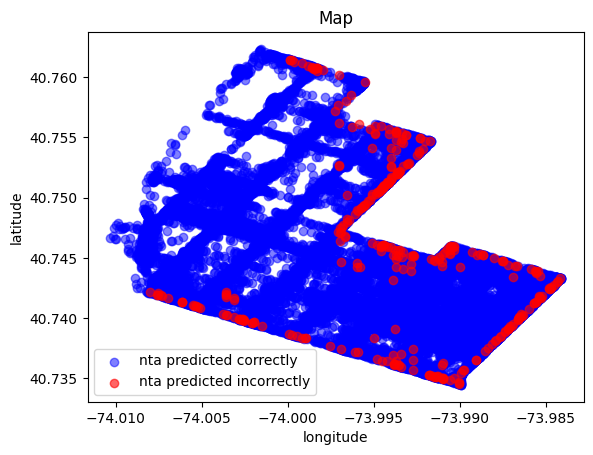

In [205]:
plot_difference("MN13")

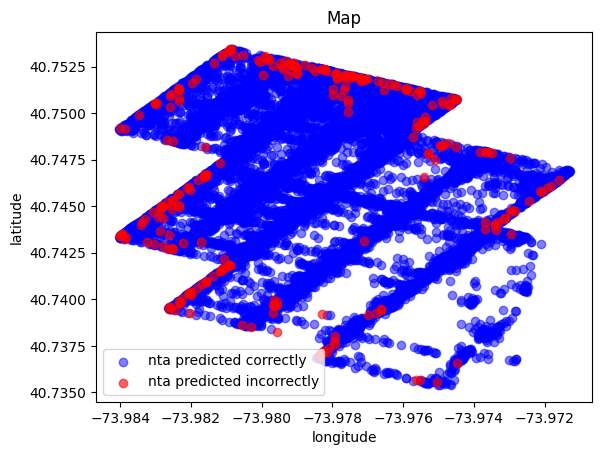

In [206]:
plot_difference("MN20")

Pickup borough has 99.98% accuracy, the data should be entirely correct

In [207]:
classifier=tree.ExtraTreeClassifier()
X=data[['pickup_longitude','pickup_latitude']]
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,data['pickup_boro_code'])
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test) ## Perfect accuracy on Boro code
print(classifier.score(X_test,Y_test)) ## Perfect accuracy on Boro code

0.9996580445030654


Dropoff NTA only has 96.35% accuracy: residuals could be investigated to see if they are really wrong and if so if there is any pattern

In [208]:
classifier=tree.ExtraTreeClassifier()
X=data[['dropoff_longitude','dropoff_latitude']]
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,data['dropoff_nta_code'])
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test)
print(classifier.score(X_test,Y_test)) 

0.9601784682022096


In [209]:
predicted=classifier.predict(X)
data_code=data.copy()
data_code["predicted_nta"]=pd.Series(predicted)
diff_mask=pd.Series(predicted)!=data["dropoff_nta_code"]
negative_mask=pd.Series(predicted)==data["dropoff_nta_code"]

In [210]:
def plot_difference(code):
    code_mask=data_code["dropoff_nta_code"].str.contains((code))
    plt.clf()
    plt.scatter(data.loc[negative_mask & code_mask]['dropoff_longitude'],data.loc[negative_mask & code_mask]['dropoff_latitude'], color = 'blue', label = "nta predicted correctly", alpha = 0.5)
    plt.scatter(data.loc[diff_mask & code_mask]['dropoff_longitude'],data.loc[diff_mask & code_mask]['dropoff_latitude'], color = 'red', label = "nta predicted incorrectly", alpha = 0.6)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title('Map')
    plt.legend()

In [211]:
print(data_code[diff_mask]["pickup_nta_code"].value_counts()[0:20])

pickup_nta_code
MN17    713
MN13    504
MN23    367
QN98    321
MN40    321
MN19    304
MN20    244
MN12    232
MN24    209
MN22    185
MN15    180
MN31    171
MN14    154
MN21    148
MN25    134
MN32    127
MN27    116
MN99     58
MN09     43
MN50     27
Name: count, dtype: int64


As most residuals find themselves on the border, we can assume data to be reliable.

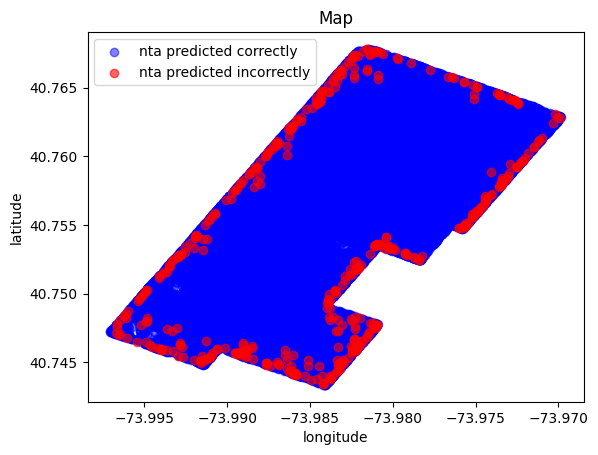

In [212]:
plot_difference("MN17")

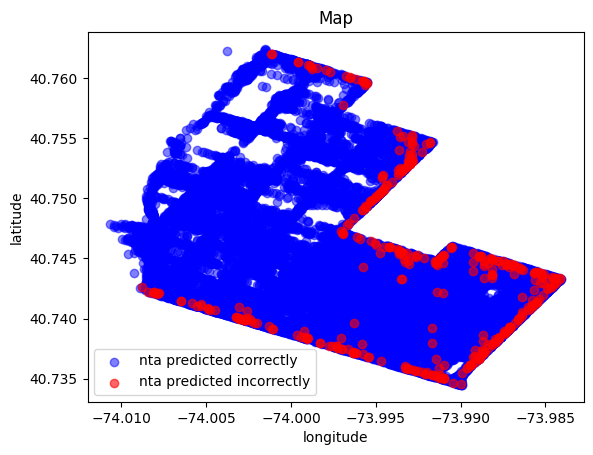

In [213]:
plot_difference("MN13")

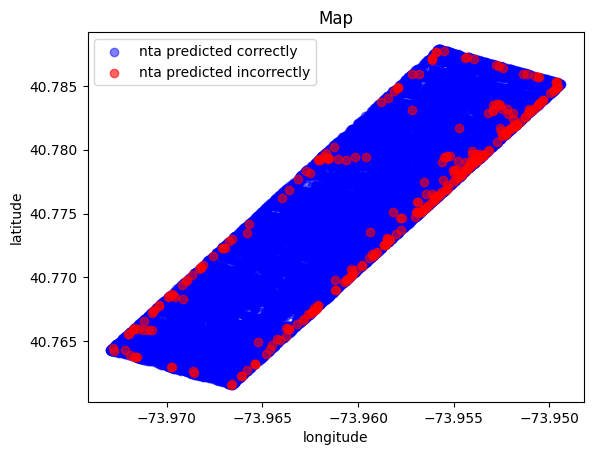

In [214]:
plot_difference("MN40")

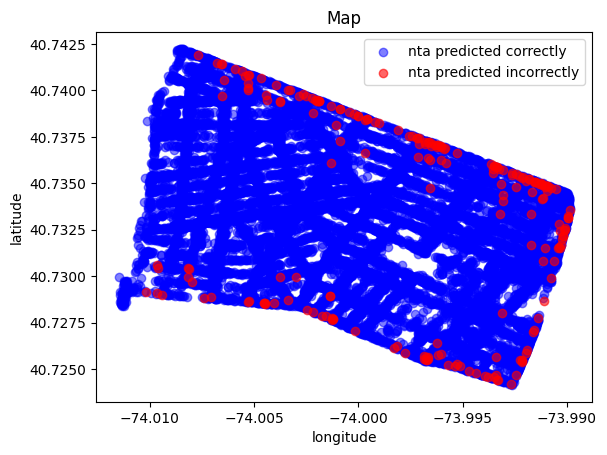

In [215]:
plot_difference("MN23")

There are 2 clusters as QN98 is a code for both JFK Airport and LaGuardia Airport

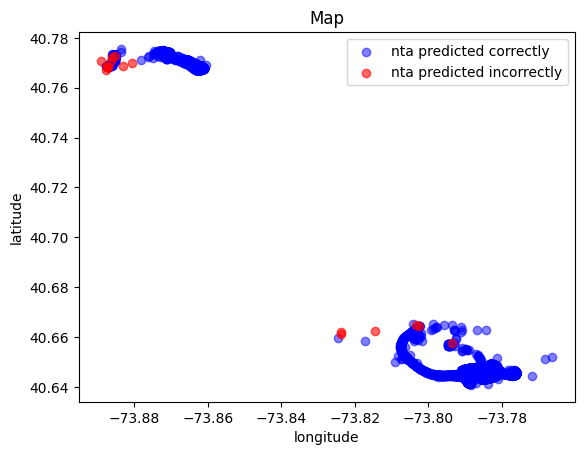

In [216]:
plot_difference("QN98")

Dropoff borough code has 99.92% accuracy: we can assume no error in the data

In [217]:
classifier=tree.ExtraTreeClassifier()
X=data[['dropoff_longitude','dropoff_latitude']]
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,data['dropoff_boro_code'])
classifier.fit(X_train,Y_train)
print(classifier.score(X_test,Y_test)) ## Perfect accuracy on Boro code


0.99946264136196


## BoroCode

BoroCode represents the 5 different Boroughs of New York. This means it is a categorical variable and not a numerical (continous) one. From  https://locatenyc.io/detail-bin we see that: 1 is Manhattan, 2 is The Bronx, 3 is Brooklyn,  4 is Queens, and 5 is Staten Island, therefore we change the numbers of pickup_boro_code and dropoff_boro_code to their respective borough.

In [218]:
borough_mapping = {
    "1": "Manhattan",
    "2": "The Bronx",
    "3": "Brooklyn",
    "4": "Queens",
    "5": "Staten Island"}

# Apply mapping to the column
data['pickup_boro_code'] = data['pickup_boro_code'].astype(str).map(borough_mapping)
data['dropoff_boro_code'] = data['dropoff_boro_code'].astype(str).map(borough_mapping)
data.head()


,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime,pickup_week,pickup_wday
0,520,Manhattan,MN15,Manhattan,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19,6.938464,-0.061536,2015-05-11 18:00:00,20,Monday
1,672,Manhattan,MN24,Manhattan,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17,13.217429,0.717429,2015-05-25 07:00:00,22,Monday
2,824,Manhattan,MN21,Manhattan,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24,9.675916,-0.324084,2015-05-06 18:00:00,19,Wednesday
3,637,Manhattan,MN17,Manhattan,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33,12.435434,0.435434,2015-05-27 02:00:00,22,Wednesday
4,2491,Manhattan,MN17,Queens,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98,39.317897,1.817897,2015-05-20 17:00:00,21,Wednesday


## Checking the pair codes with the pickup and droppoff codes

In [219]:
first_code_data = data["pickup_nta_code"]
last_code_data = data["dropoff_nta_code"]
pair = data["pair"]

data_pair = first_code_data + "-" + last_code_data

list = data_pair == pair
all(list)

True

## Check that first two letters of NTAcode correspond to the right borough.

In [220]:
data['first_two_letters_pickup'] = data['pickup_nta_code'].apply(lambda x: x[:2])
data['first_two_letters_dropoff']= data['dropoff_nta_code'].apply(lambda x: x[:2])
data['first_two_letters_pickup'].value_counts()

first_two_letters_pickup
MN    453666
QN     28234
BK      9193
BX       175
SI        24
Name: count, dtype: int64

In [221]:

nta_mapping = {
    "MN": "Manhattan",
    "BX": "The Bronx",
    "BK": "Brooklyn",
    "QN": "Queens",
    "SI": "Staten Island"}

# Apply mapping to the column
data['first_two_letters_pickup'] = data['first_two_letters_pickup'].astype(str).map(nta_mapping)
data['first_two_letters_dropoff'] = data['first_two_letters_dropoff'].astype(str).map(nta_mapping)
data.head()
assert np.array_equal(np.array(data['first_two_letters_pickup']), np.array(data['pickup_boro_code']))
assert np.array_equal(np.array(data['first_two_letters_dropoff']), np.array(data['dropoff_boro_code']))

In [222]:
(data['first_two_letters_pickup'].equals(data['pickup_boro_code']), data['first_two_letters_dropoff'].equals(data['dropoff_boro_code']))


(True, True)

Since these columns are identical, it means that the first two letters of NTA code match the borough so we can delete the auxillary columns and the pair column. Here we also delete the auxiliary variables, 'predicted_fare', 'pred_diff',  created from the prediction of the linear model as they are not used anymore.

In [223]:
data.drop(['first_two_letters_pickup', 'first_two_letters_dropoff','pair', 'predicted_fare', 'pred_diff'], axis=1, inplace = True)

# Correlations Matrix

We drop categorical variables that have too many categories for a feasible correlation analysis

In [68]:
cor_data=pd.get_dummies(data.drop(["pickup_nta_code","dropoff_nta_code","pair"], axis=1))

In [69]:
cor_data

,weight,response,pickup_hour,pickup_month,pickup_day,length_time,pickup_boro_code,dropoff_boro_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,predicted_fare,pred_diff,pickup_datetime,pickup_week
0,1,1.75,18,5,132,520,1,1,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,6.895083,-0.104917,2015-05-12 18:00:00,20
1,1,2.95,18,5,127,824,1,1,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,9.666208,-0.333792,2015-05-07 18:00:00,19
2,1,2.46,7,5,132,1016,1,1,-74.012741,40.702229,-73.998878,40.713711,2,1,1.14,11.5,10.300327,-1.199673,2015-05-12 07:00:00,20
3,1,1.66,11,5,134,550,1,1,-73.970909,40.767231,-73.979507,40.752331,2,1,1.28,7.5,7.809471,0.309471,2015-05-14 11:00:00,20
4,1,1.75,20,5,128,501,1,1,-73.973869,40.747925,-73.986618,40.730328,1,1,1.40,7.5,7.751622,0.251622,2015-05-08 20:00:00,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343741,1,2.00,20,5,145,740,1,1,-73.978676,40.783512,-73.938370,40.850533,2,1,5.84,18.5,17.774448,-0.725552,2015-05-25 20:00:00,22
343742,1,1.00,23,5,141,193,1,1,-73.982048,40.775452,-73.976860,40.783520,2,6,0.70,4.5,4.569122,0.069122,2015-05-21 23:00:00,21
343743,1,2.35,19,5,132,764,1,1,-73.974472,40.747253,-73.983070,40.726955,1,1,1.70,10.0,9.892054,-0.107946,2015-05-12 19:00:00,20
343744,1,2.65,21,5,140,955,1,1,-73.993607,40.745293,-73.987350,40.722256,1,1,2.20,12.0,11.993370,-0.006630,2015-05-20 21:00:00,21


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(correlation_matrix):
    plt.figure(figsize=(20, 20))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Correlation Matrix')
    plt.show()


In [71]:
cor_mat=cor_data.corr()

The correlation matrix shows both expected and unexpected correlations. Fare amount correlates with some dropoff locations: negatively for Manhattan and positively for Queens and Brooklyn. Its the same with pickup locations, except for Brooklyn where it becomes close to 0. It's also correlated with other numeric variables, but we know well from former regression analysis that they are predictiors of fare. We can clearly see that there is a difference in passanger count within 2 possible vendors. Latitude and longitude obviously correlates with codes for places and each week has a weak correlation with days, both are to be expected.

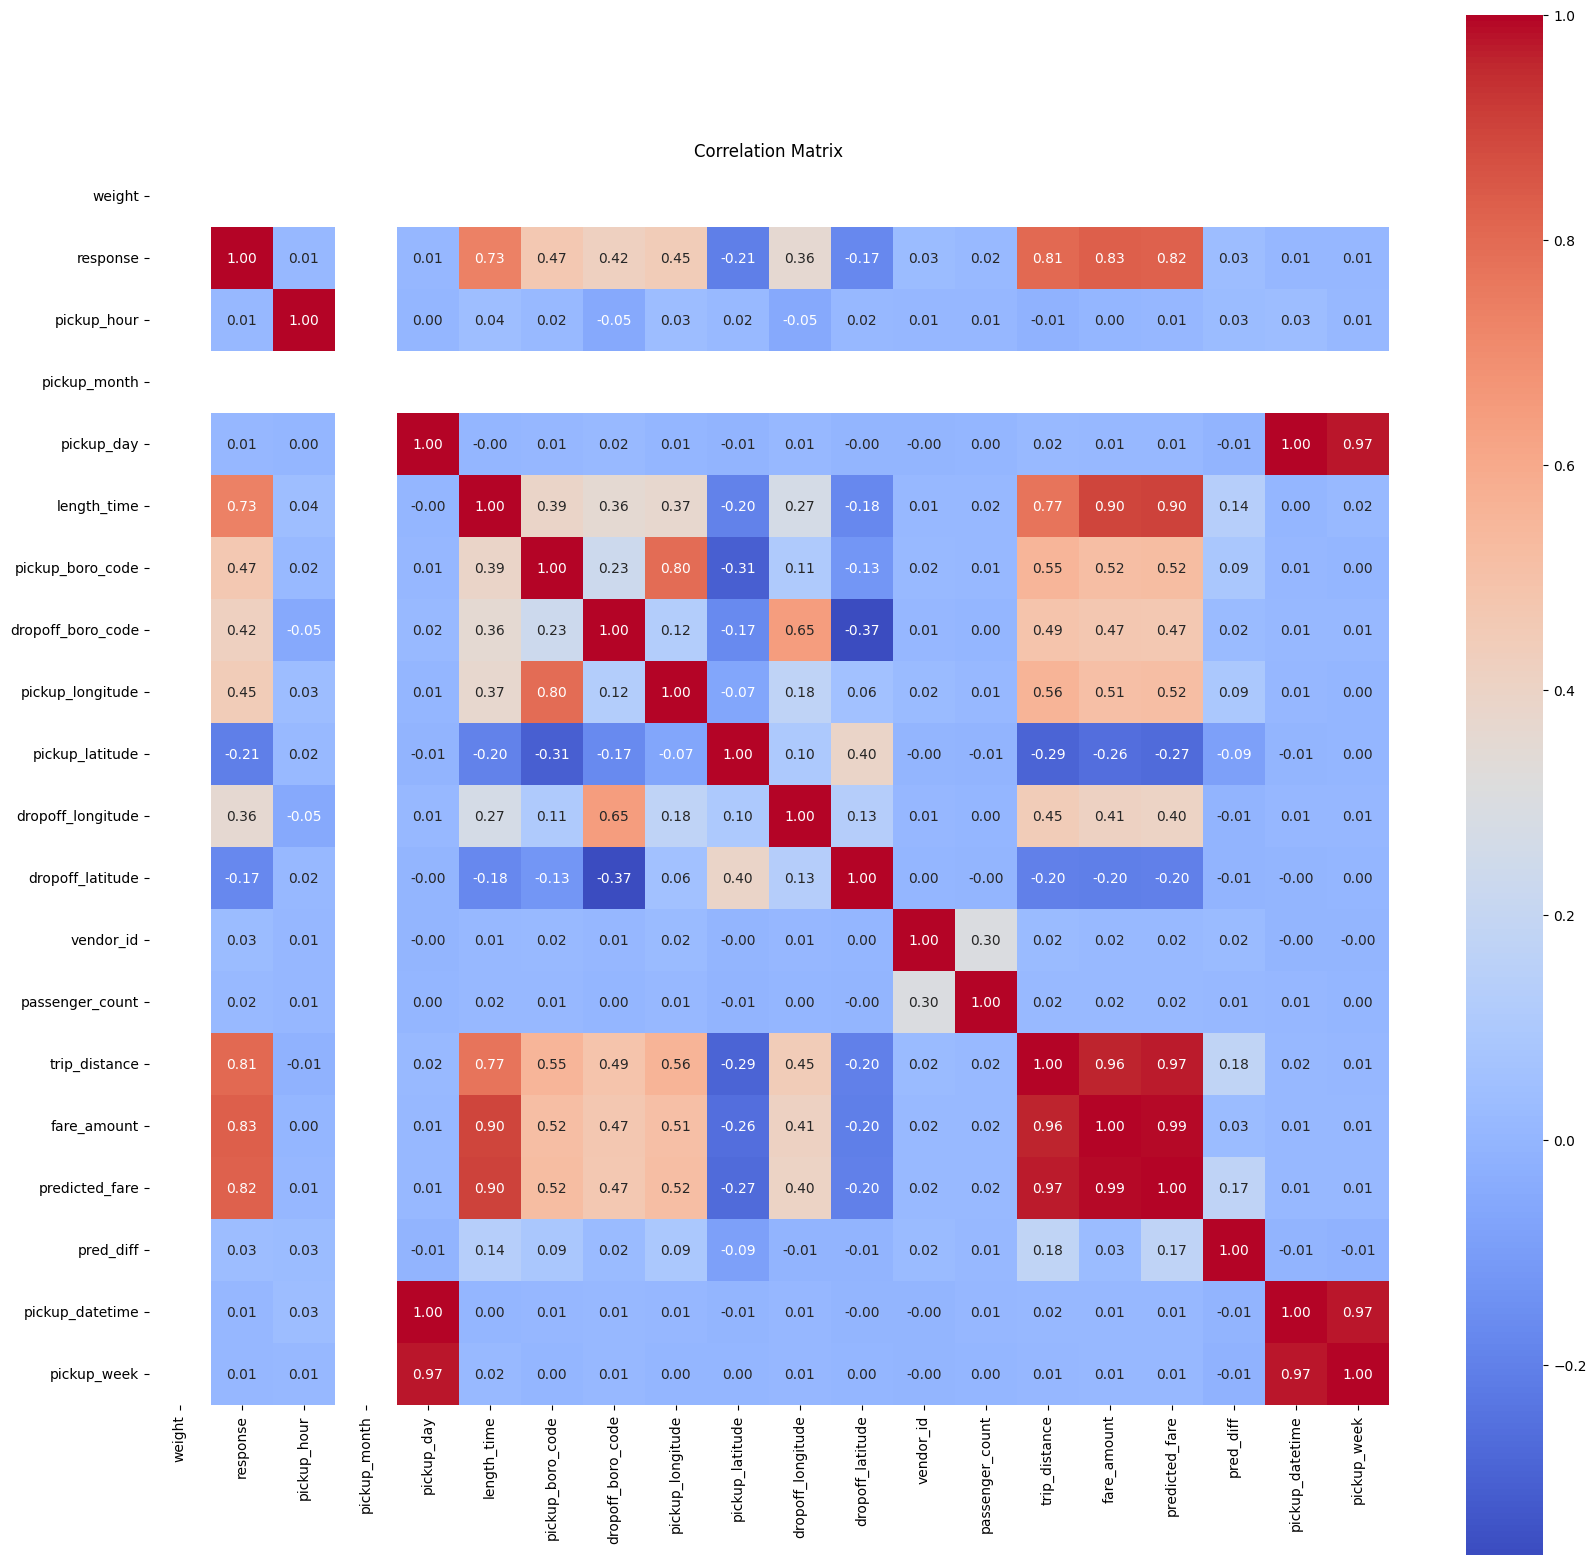

In [72]:
plot_correlation_matrix(cor_mat)

# Vendor_Id ANOVA using boxplot

## Fare amount

Since Vendor_Id is a column containing only 2 distinct values, we decided to see how much does distribution of price and passengers differ among vendors to see how much information vendor id carries.

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_box_plot(data, x_col,y_col, **args):

    plt.clf()
    plt.figure(figsize=(25, 12)) 
    sns.boxplot(x=data[x_col],y=data[y_col],**args,whis=1.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()



<Figure size 640x480 with 0 Axes>

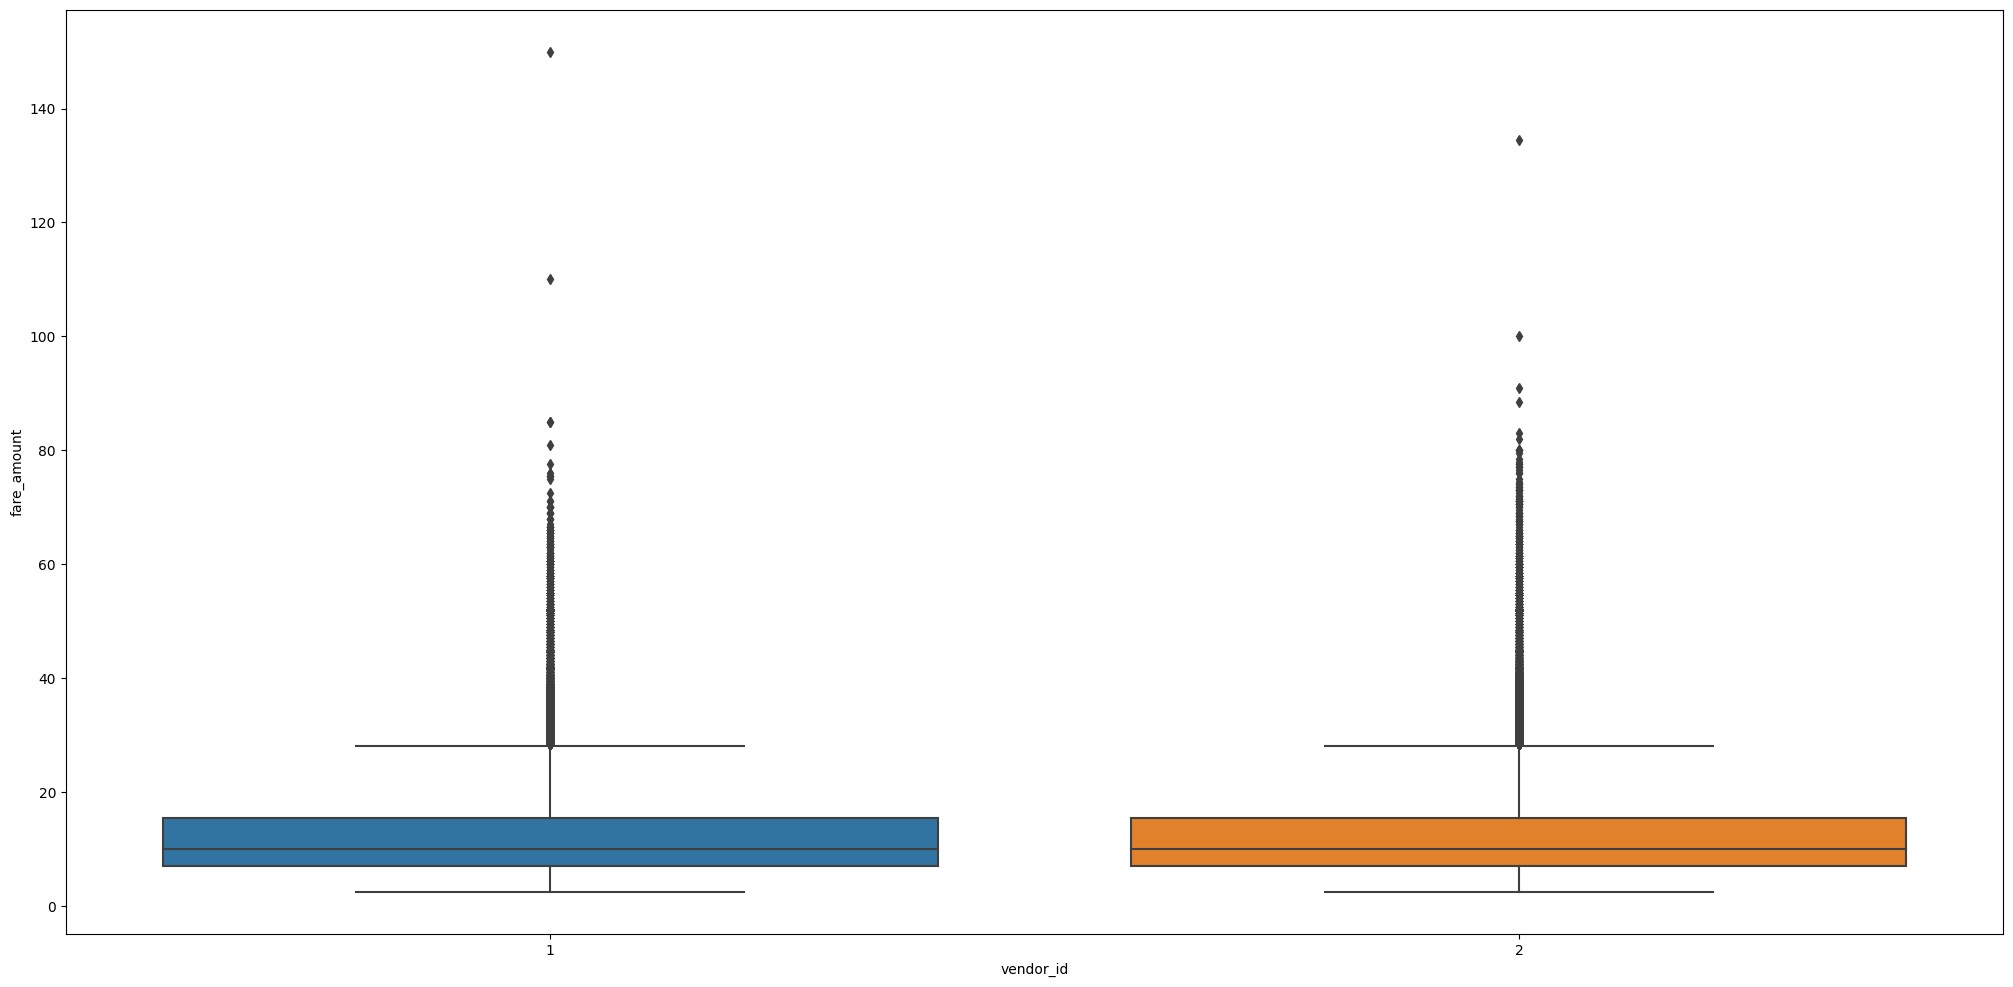

In [75]:
create_box_plot(data,x_col="vendor_id",y_col="fare_amount")


As we can see above, 1st vendor has less of extreme outliers compared to 2nd vendor. However since we are interested in overall distribution we graph it below restricting outlier in the price.

<Figure size 640x480 with 0 Axes>

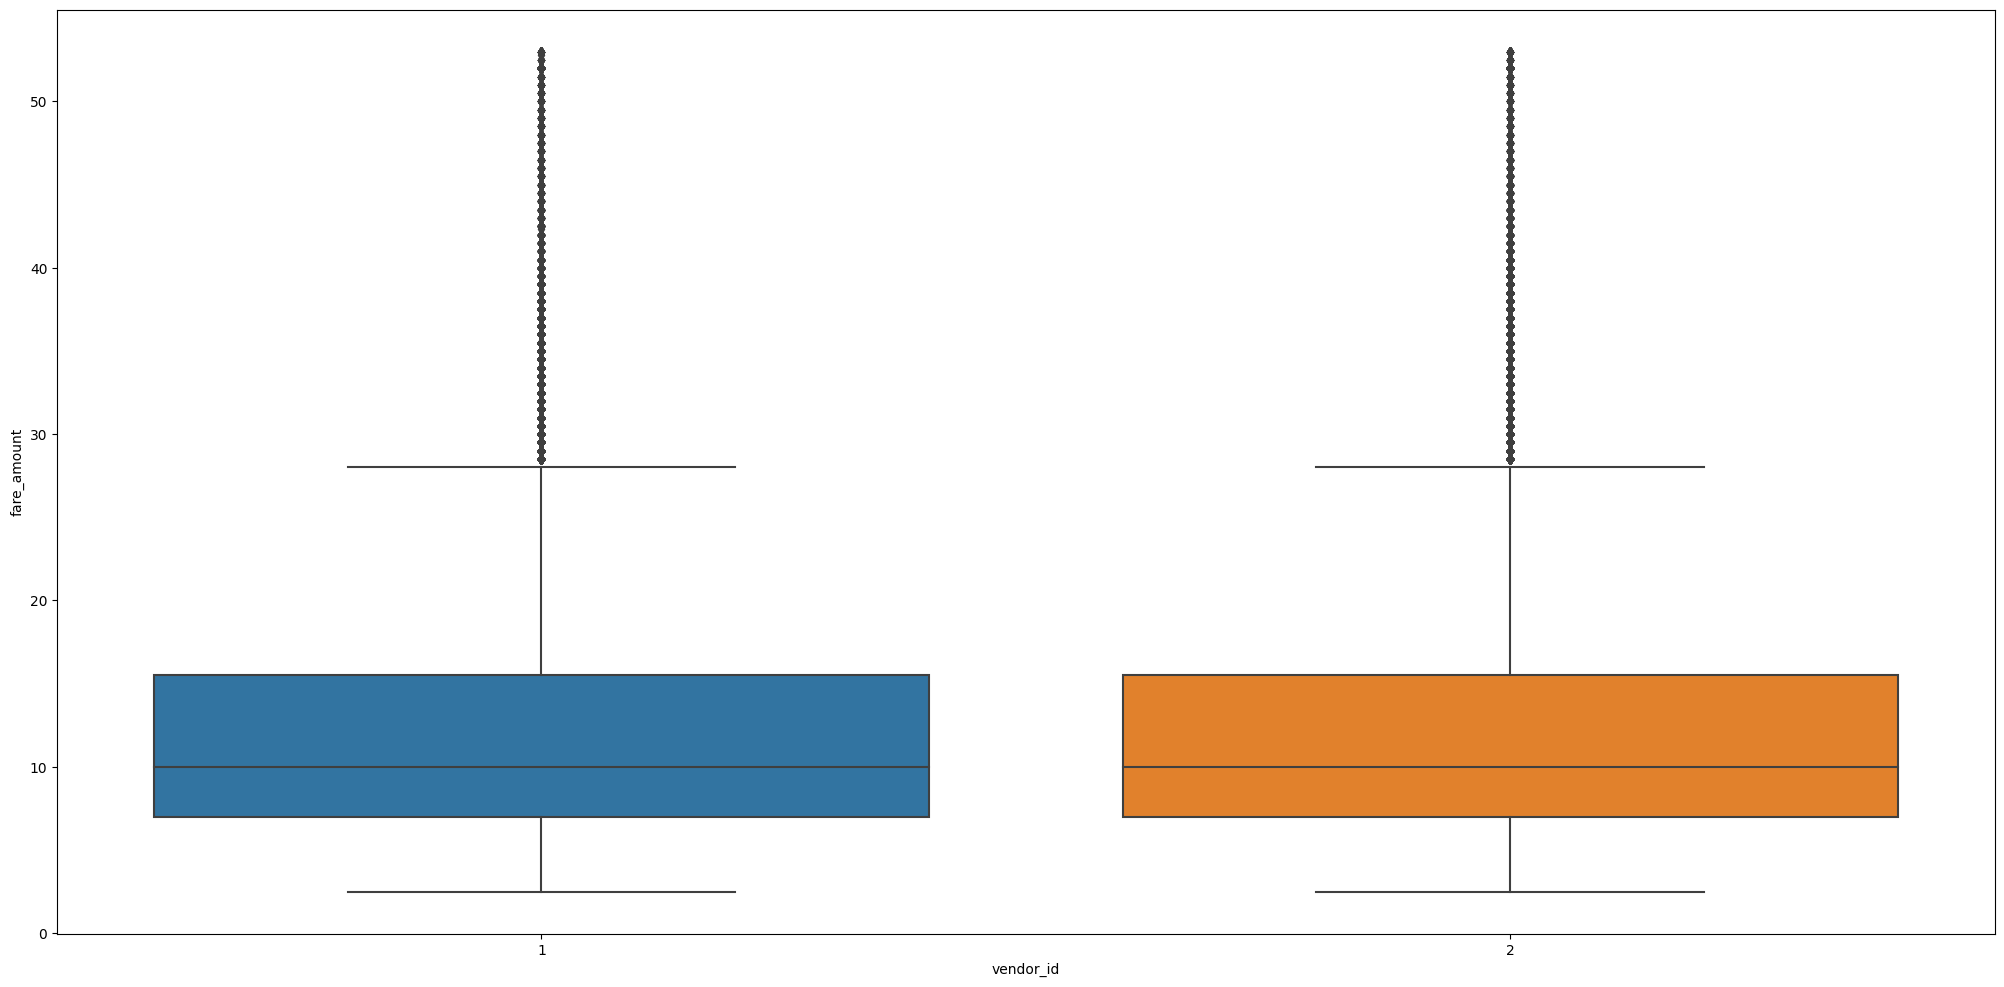

In [76]:
fare_mask=data["fare_amount"]<=53
fare_mask_down=data["fare_amount"]>0.01 
masked=data[fare_mask & fare_mask_down]
create_box_plot(masked,x_col="vendor_id",y_col="fare_amount")


<Axes: >

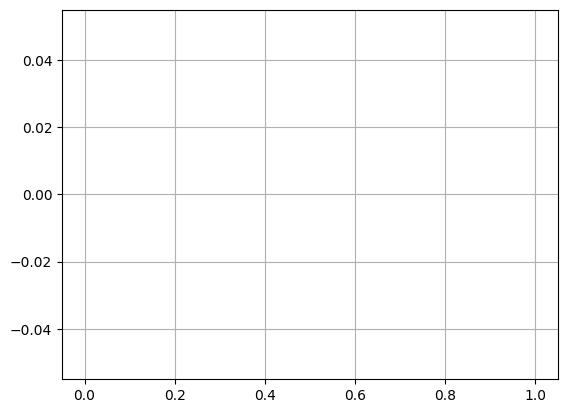

In [77]:
masked["fare_amount"].loc[masked["vendor_id"]=="1"].hist()

<Axes: >

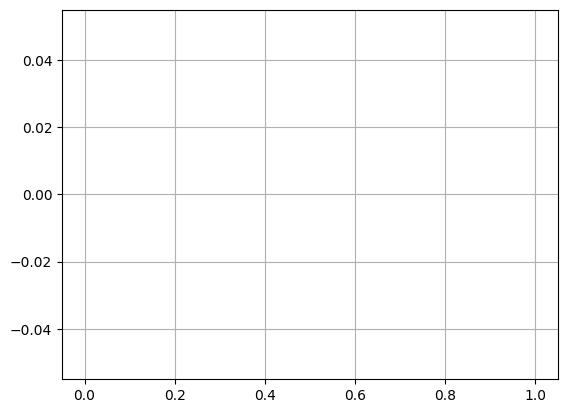

In [78]:
masked[masked["vendor_id"]=="2"]["fare_amount"].hist()

As we can see form boxplots and histograms the only other difference in distribution is that vendor 2 has significantly less proportion of low fare rides

## Passanger count

As we can see there are bigg differences in distribution of passangers. Company 2 is clearly favoured by groups of 2 or more people. Possibly they have discounts or bigger vehicles in operations more often.

<Figure size 640x480 with 0 Axes>

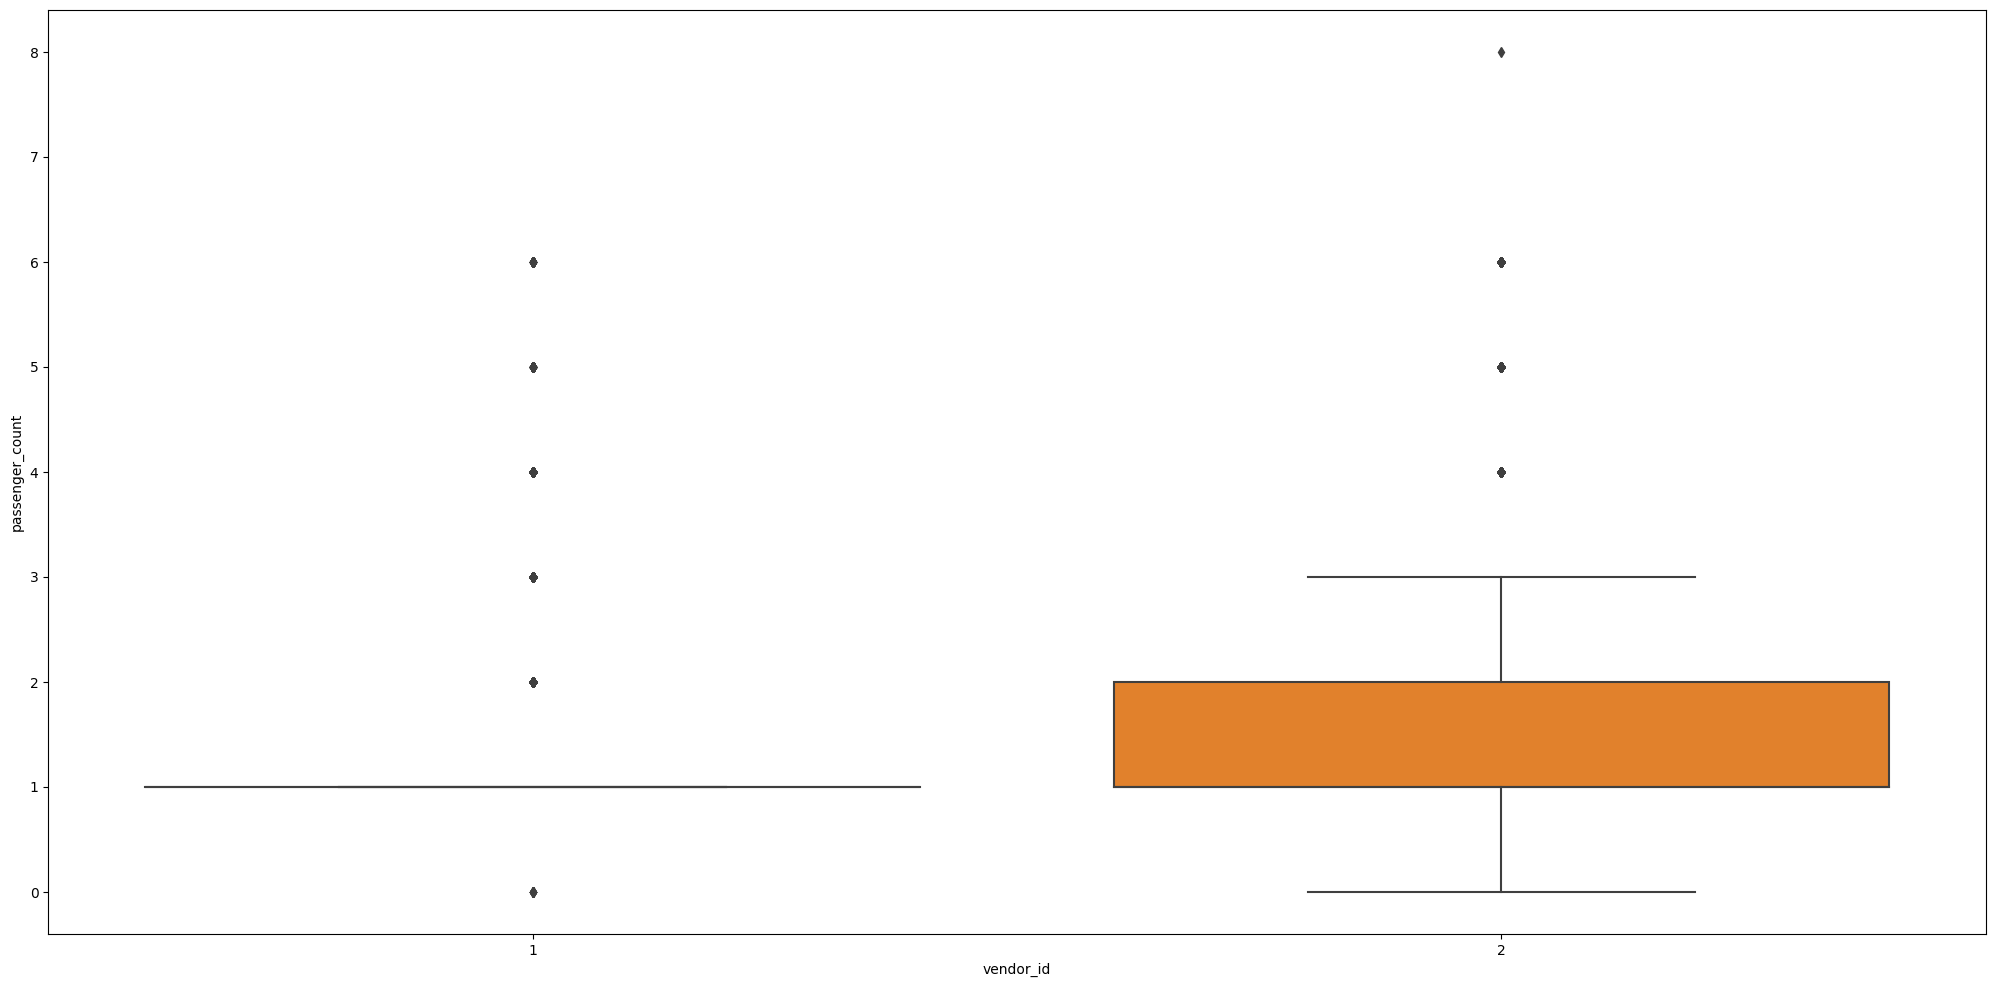

In [234]:
create_box_plot(data,x_col="vendor_id",y_col="passenger_count")

<Axes: >

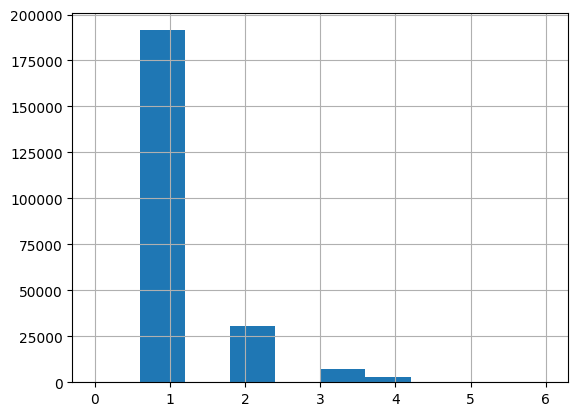

In [235]:
masked["passenger_count"].loc[masked["vendor_id"]=="1"].hist()

<Axes: >

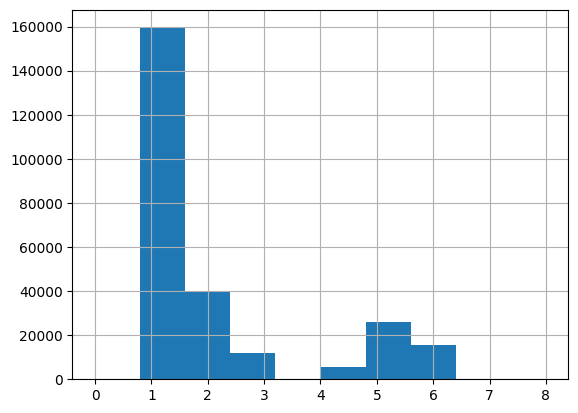

In [236]:
masked["passenger_count"].loc[masked["vendor_id"]=="2"].hist()

In [237]:
data

,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pickup_datetime,pickup_week,pickup_wday
0,520,Manhattan,MN15,Manhattan,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,2015-05-11 18:00:00,20,Monday
1,672,Manhattan,MN24,Manhattan,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,2015-05-25 07:00:00,22,Monday
2,824,Manhattan,MN21,Manhattan,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,2015-05-06 18:00:00,19,Wednesday
3,637,Manhattan,MN17,Manhattan,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,2015-05-27 02:00:00,22,Wednesday
4,2491,Manhattan,MN17,Queens,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,2015-05-20 17:00:00,21,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491287,193,Manhattan,MN14,Manhattan,MN12,-73.982048,40.775452,-73.976860,40.783520,2,6,0.70,4.5,2015-05-20 23:00:00,21,Wednesday
491288,945,Manhattan,MN40,Manhattan,MN22,-73.956261,40.787140,-73.978577,40.728729,1,1,5.30,18.0,2015-05-30 22:00:00,22,Saturday
491289,764,Manhattan,MN20,Manhattan,MN22,-73.974472,40.747253,-73.983070,40.726955,1,1,1.70,10.0,2015-05-11 19:00:00,20,Monday
491290,955,Manhattan,MN13,Manhattan,MN27,-73.993607,40.745293,-73.987350,40.722256,1,1,2.20,12.0,2015-05-19 21:00:00,21,Tuesday


# Exporting final dataset to CSV

In [238]:
data.shape
data.to_csv('tidy_dataset_variance_killers.csv', index=False)